# Parte 1: Infraestrutura

    Os arquivos .ipynb e .txt encontram-se em anexo.

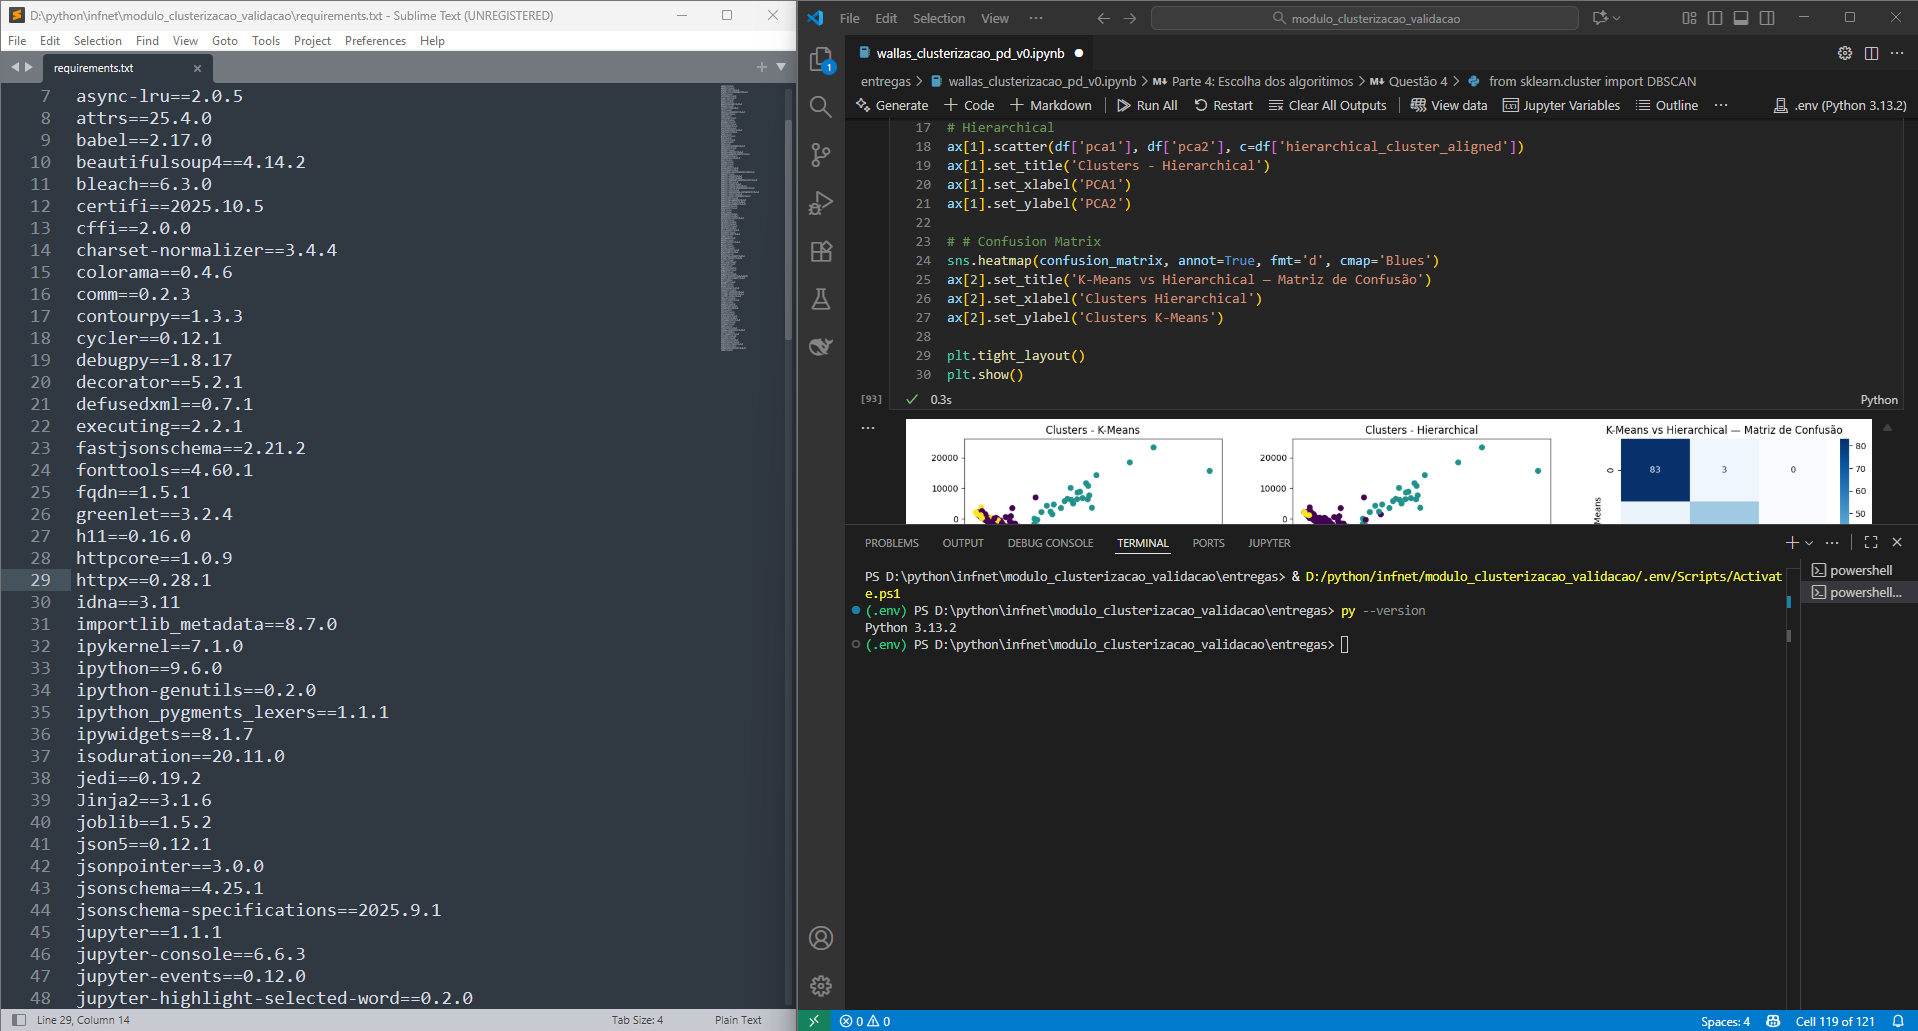

# Parte 2: Base de dados
## Questão 1

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\walla\.cache\kagglehub\datasets\rohan0301\unsupervised-learning-on-country-data\versions\2


In [2]:
import os

files = []
for f in os.listdir(path):
  files.append(f)

print(files)

['Country-data.csv', 'data-dictionary.csv']


In [3]:
import pandas as pd

file_path = os.path.join(path, files[0])
print(file_path)

C:\Users\walla\.cache\kagglehub\datasets\rohan0301\unsupervised-learning-on-country-data\versions\2\Country-data.csv


In [4]:
df = pd.read_csv(file_path)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
print(df.info())
print("="*50)
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


## Questão 2

Quantos países existem no dataset?

---

**Resposta:**
- *Existem 167 paises distintos no dataset*

In [99]:
df.country.nunique()

167

## Questão 3

Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

---
**Resposta:**

- *As variáveis possuem escalas bastante distintas (por exemplo, income varia de 609 a 125.000, enquanto child_mort varia de 2,6 a 208). Portanto, é necessário padronizar os dados antes da etapa de clusterização, utilizando técnicas como o StandardScaler.*
- *Observa-se também a presença de outliers em diversas variáveis. Vale destacar que alguns algoritmos são sensíveis à presença de outliers, logo, é importante avaliar cuidadosamente esses valores no conjunto de dados para decidir se devem ser removidos ou tratados ao fim das análises*

=== PARTE 2: ANÁLISE DA FAIXA DINÂMICA DAS VARIÁVEIS ===


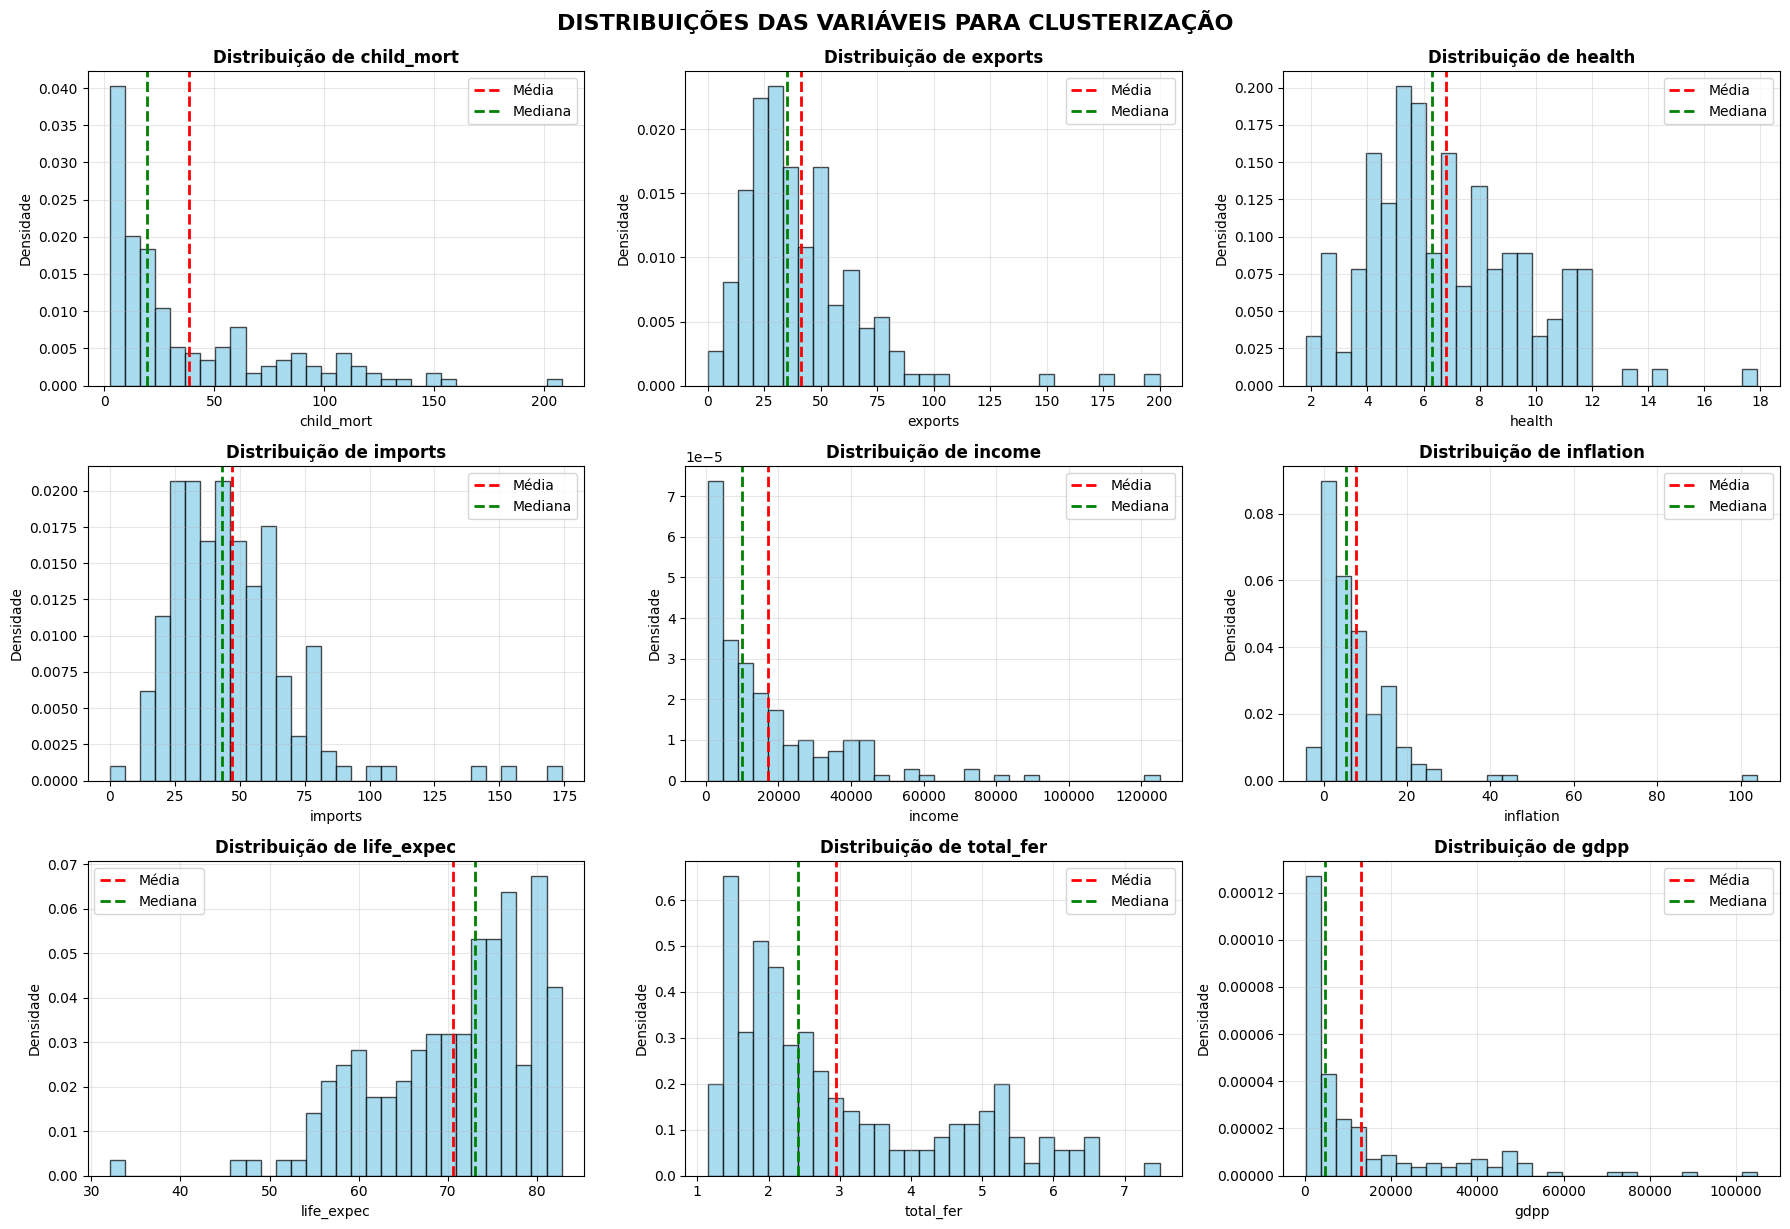

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


print("=== PARTE 2: ANÁLISE DA FAIXA DINÂMICA DAS VARIÁVEIS ===")

# Variáveis que serão usadas na clusterização
variables = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# 1. Histogramas para visualizar distribuições
plt.figure(figsize=(18, 12))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[var], bins=30, alpha=0.7, color='skyblue', edgecolor='black', density=True)
    plt.axvline(df[var].mean(), color='red', linestyle='--', linewidth=2, label='Média')
    plt.axvline(df[var].median(), color='green', linestyle='--', linewidth=2, label='Mediana')
    plt.title(f'Distribuição de {var}', fontsize=12, fontweight='bold')
    plt.xlabel(var)
    plt.ylabel('Densidade')
    plt.legend()
    plt.grid(alpha=0.3)
plt.tight_layout()
plt.suptitle('DISTRIBUIÇÕES DAS VARIÁVEIS PARA CLUSTERIZAÇÃO', fontsize=16, fontweight='bold', y=1.02)
plt.show()

In [8]:
cols_num = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']

cols_cat = ['country']

In [9]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df[cols_num], palette='Set2', orient='h', fliersize=3)
# plt.title('Distribuição dos dados', fontsize=14, fontweight='bold')
# plt.xlabel('Valor')
# plt.ylabel('Variável')
# plt.grid(axis='x', linestyle='--', alpha=0.7)
# plt.show()

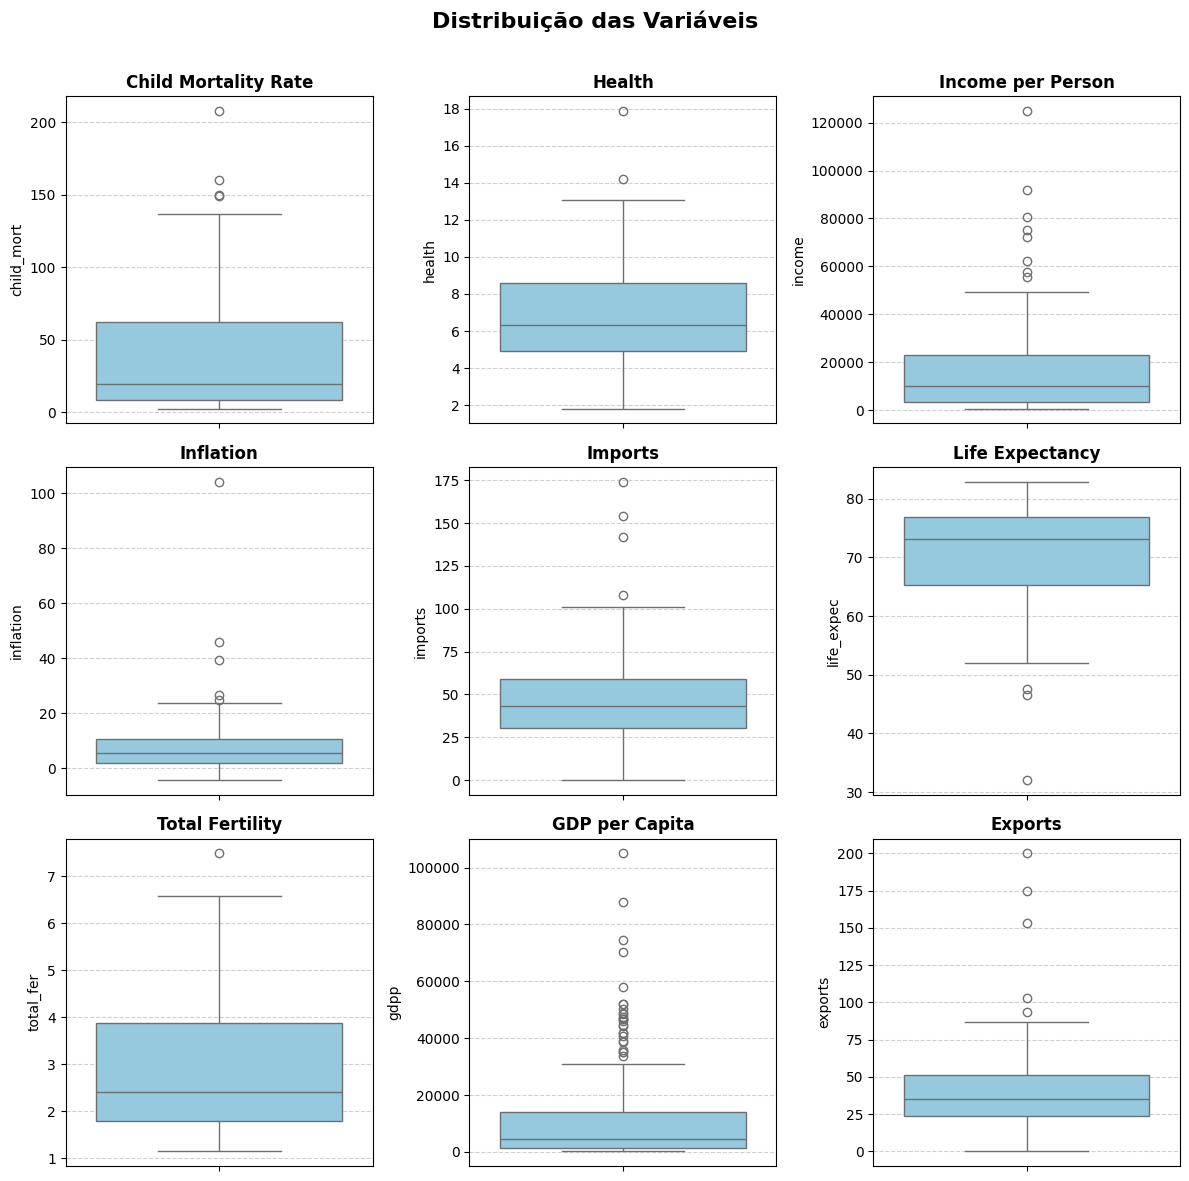

In [11]:
# lista com os nomes das colunas e títulos
cols = [
    ('child_mort', 'Child Mortality Rate'),
    ('health', 'Health'),
    ('income', 'Income per Person'),
    ('inflation', 'Inflation'),
    ('imports', 'Imports'),
    ('life_expec', 'Life Expectancy'),
    ('total_fer', 'Total Fertility'),
    ('gdpp', 'GDP per Capita'),
    ('exports', 'Exports')
]

# cria a figura e os eixos
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()  # transforma a grade 3x3 em uma lista

# loop para criar cada boxplot
for i, (col, title) in enumerate(cols):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(title, fontsize=12, fontweight='bold')
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

# remove eixos extras (caso tenha sobrado espaço)
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

# título geral
fig.suptitle('Distribuição das Variáveis', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


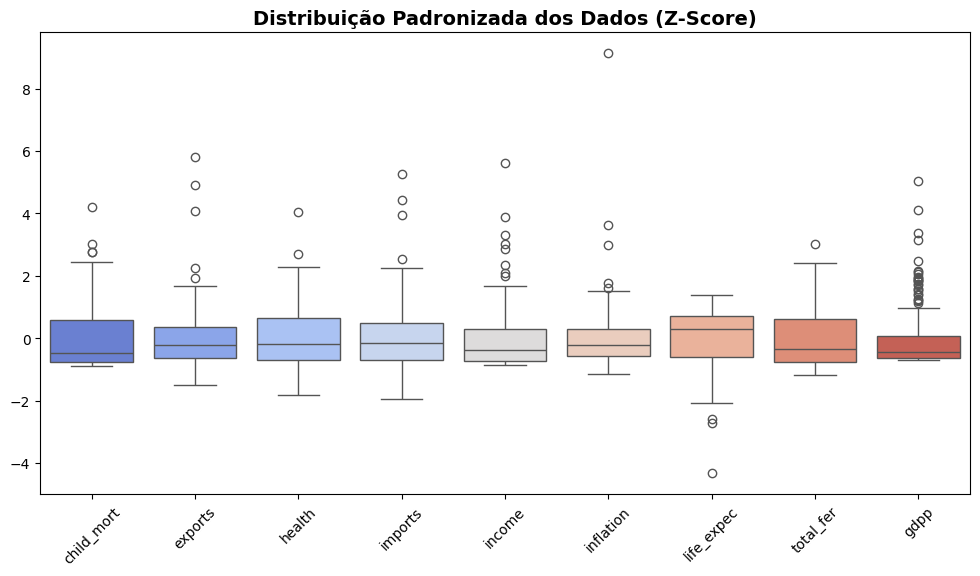

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[cols_num]), columns=cols_num)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled, palette='coolwarm')
plt.title('Distribuição Padronizada dos Dados (Z-Score)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


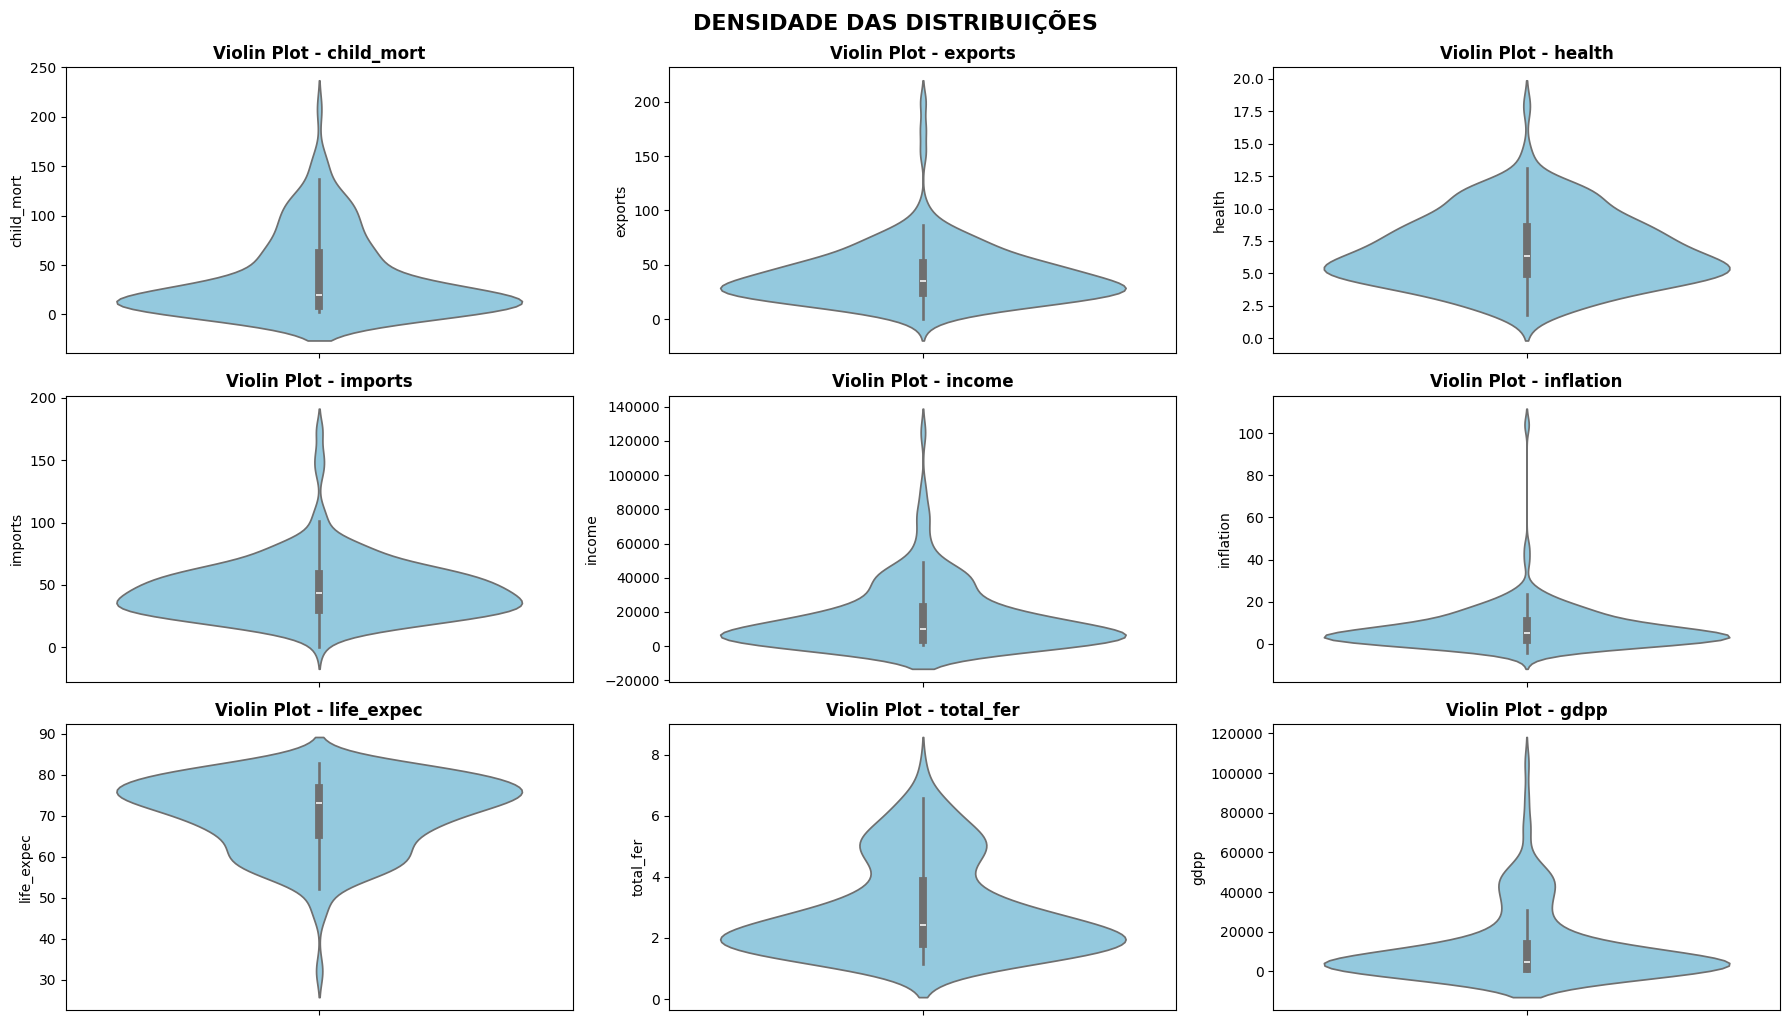

In [13]:
# densidade e distribuição
plt.figure(figsize=(18, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(y=df[var], color='skyblue')
    plt.title(f'Violin Plot - {var}', fontsize=12, fontweight='bold')
    plt.ylabel(var)
plt.tight_layout()
plt.suptitle('DENSIDADE DAS DISTRIBUIÇÕES', fontsize=16, fontweight='bold', y=1.02)
plt.show()

In [14]:
# Análise estatística detalhada
stats_df = df[variables].describe().T
stats_df['cv'] = stats_df['std'] / stats_df['mean']  # Coeficiente de variação
stats_df['range'] = stats_df['max'] - stats_df['min']
stats_df['dynamic_range'] = stats_df['max'] / stats_df['min']  # Faixa dinâmica

print("Estatísticas descritivas com análise de faixa dinâmica:")
print(stats_df.round(2).to_string())

Estatísticas descritivas com análise de faixa dinâmica:
            count      mean       std     min      25%      50%       75%        max    cv      range  dynamic_range
child_mort  167.0     38.27     40.33    2.60     8.25    19.30     62.10     208.00  1.05     205.40          80.00
exports     167.0     41.11     27.41    0.11    23.80    35.00     51.35     200.00  0.67     199.89        1834.86
health      167.0      6.82      2.75    1.81     4.92     6.32      8.60      17.90  0.40      16.09           9.89
imports     167.0     46.89     24.21    0.07    30.20    43.30     58.75     174.00  0.52     173.93        2640.36
income      167.0  17144.69  19278.07  609.00  3355.00  9960.00  22800.00  125000.00  1.12  124391.00         205.25
inflation   167.0      7.78     10.57   -4.21     1.81     5.39     10.75     104.00  1.36     108.21         -24.70
life_expec  167.0     70.56      8.89   32.10    65.30    73.10     76.80      82.80  0.13      50.70           2.58
total_fe

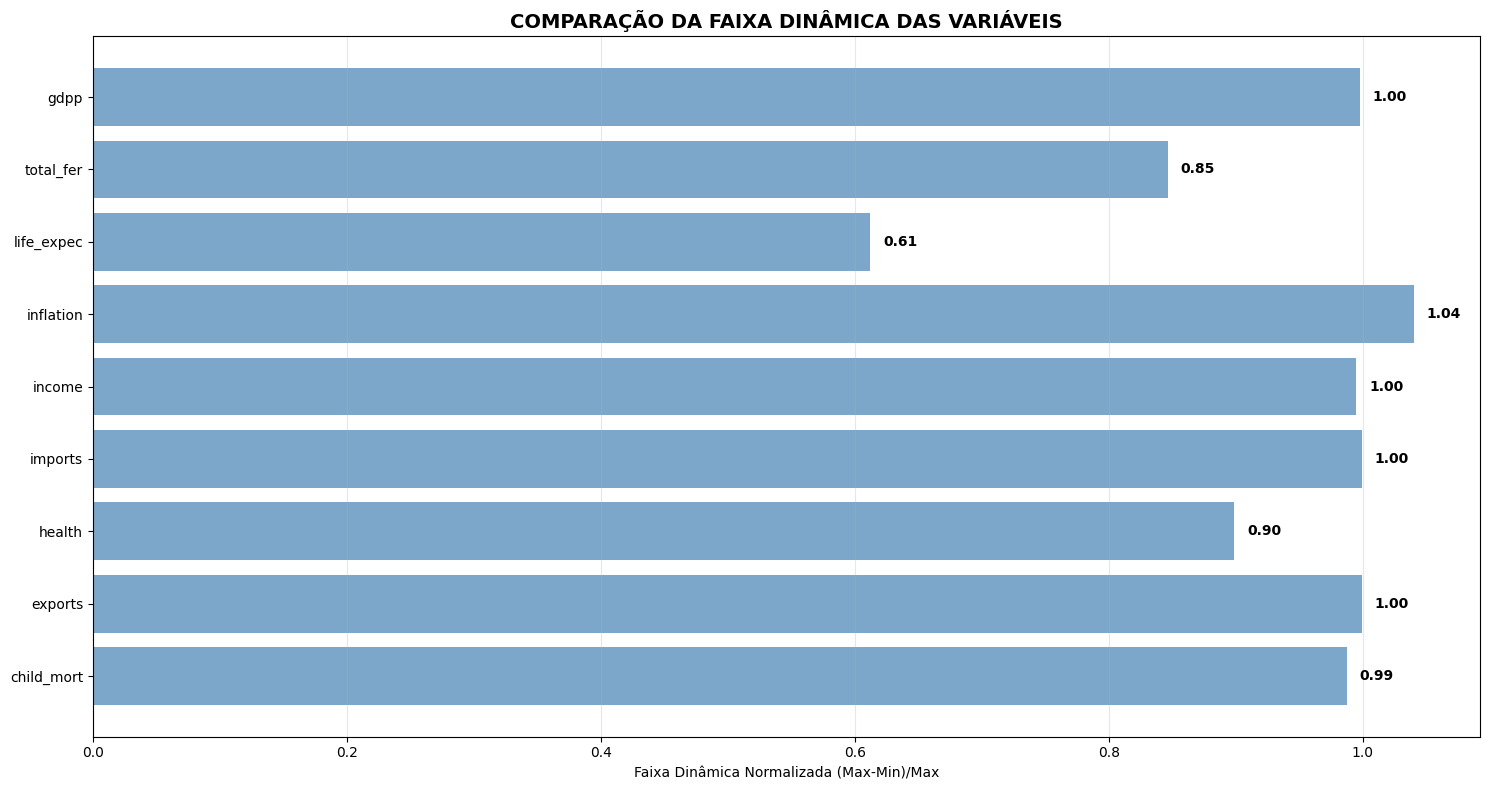

In [15]:
# Visualização da faixa dinâmica
plt.figure(figsize=(15, 8))

# Normalização para visualização comparativa
normalized_ranges = (stats_df['max'] - stats_df['min']) / stats_df['max']
bars = plt.barh(stats_df.index, normalized_ranges, color='steelblue', alpha=0.7)
plt.xlabel('Faixa Dinâmica Normalizada (Max-Min)/Max')
plt.title('COMPARAÇÃO DA FAIXA DINÂMICA DAS VARIÁVEIS', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Adicionar valores nas barras
for bar, value in zip(bars, normalized_ranges):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{value:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

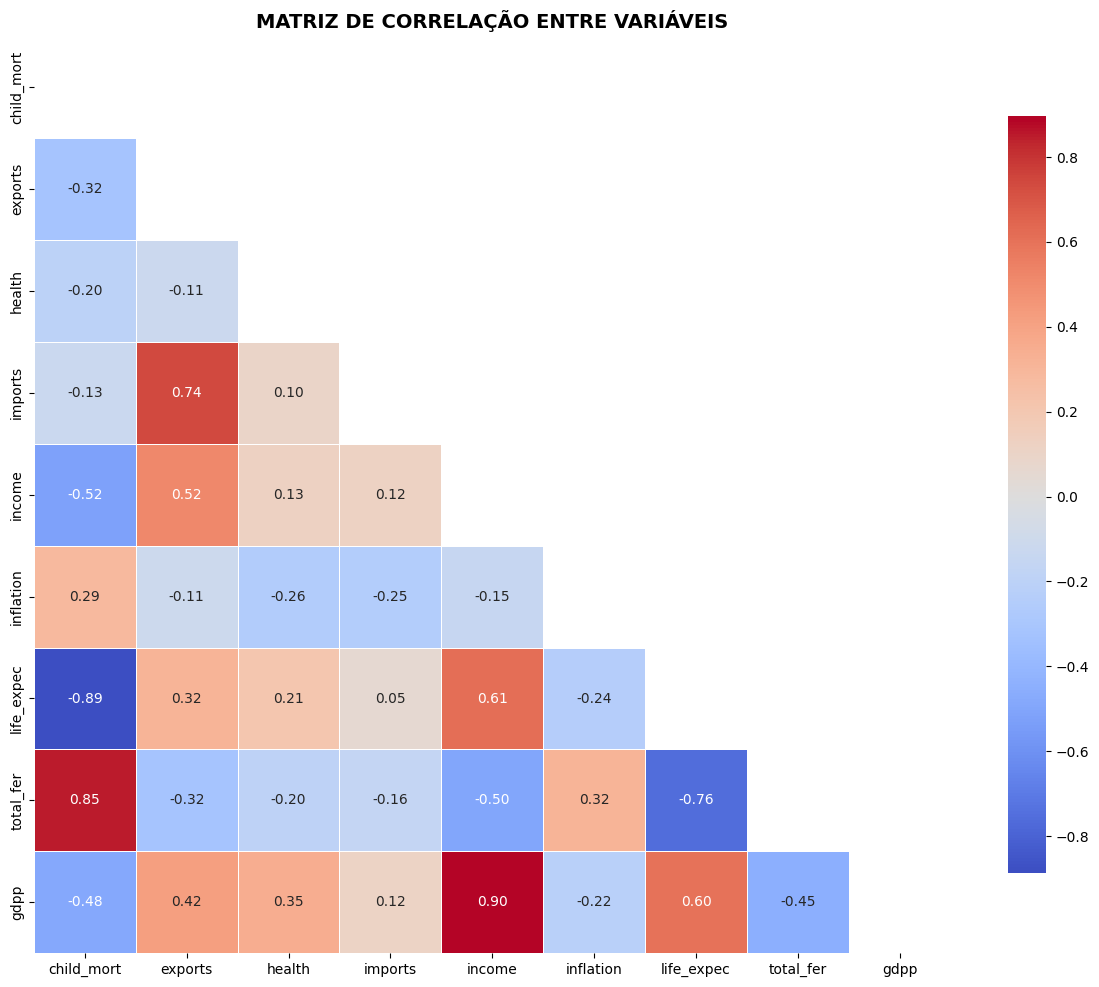

In [16]:
# Matriz de correlação para entender relações entre variáveis
plt.figure(figsize=(12, 10))
correlation_matrix = df[variables].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix,mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('MATRIZ DE CORRELAÇÃO ENTRE VARIÁVEIS', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [17]:
# Opções:
"""
a) Winsorization: limitar valores extremos
b) Transformação logarítmica para variáveis assimétricas
c) Remoção de outliers extremos (se justificável)
d) Usar algoritmos robustos a outliers (DBSCAN, K-Medóides)
"""

# Análise de outliers
print(f"{'==='*10} IDENTIFICAÇÃO DE OUTLIERS EXTREMOS {'==='*10}\n")
for var in variables:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_upper = df[df[var] > upper_bound]
    if len(outliers_upper) > 0:
      print(f"\n{var}: {len(outliers_upper)} outliers acima")
      for _, row in outliers_upper.head(3).iterrows():
          print(f"  - {row['country']}: {row[var]:.1f} (limite: {upper_bound:.1f})")


    outliers_lower = df[df[var] < lower_bound]
    if len(outliers_lower) > 0:
      print(f"\n{var}: {len(outliers_lower)} outliers abaixo")
      for _, row in outliers_lower.head(3).iterrows():
          print(f"  - {row['country']}: {row[var]:.1f} (limite: {lower_bound:.1f})")

============================== IDENTIFICAÇÃO DE OUTLIERS EXTREMOS ==============================


child_mort: 4 outliers acima
  - Central African Republic: 149.0 (limite: 142.9)
  - Chad: 150.0 (limite: 142.9)
  - Haiti: 208.0 (limite: 142.9)

exports: 5 outliers acima
  - Ireland: 103.0 (limite: 92.7)
  - Luxembourg: 175.0 (limite: 92.7)
  - Malta: 153.0 (limite: 92.7)

health: 2 outliers acima
  - Micronesia, Fed. Sts.: 14.2 (limite: 14.1)
  - United States: 17.9 (limite: 14.1)

imports: 4 outliers acima
  - Luxembourg: 142.0 (limite: 101.6)
  - Malta: 154.0 (limite: 101.6)
  - Seychelles: 108.0 (limite: 101.6)

income: 8 outliers acima
  - Brunei: 80600.0 (limite: 51967.5)
  - Kuwait: 75200.0 (limite: 51967.5)
  - Luxembourg: 91700.0 (limite: 51967.5)

inflation: 5 outliers acima
  - Equatorial Guinea: 24.9 (limite: 24.2)
  - Mongolia: 39.2 (limite: 24.2)
  - Nigeria: 104.0 (limite: 24.2)

life_expec: 3 outliers abaixo
  - Central African Republic: 47.5 (limite: 48.0)
  - Haiti: 3

## Questão 4

Realize o pré-processamento adequado dos dados.

---
**Resposta:**
- *Considerou-se nessa etapa a redução de dimensionlidade dos dados para facilitar a visualização e a interpretação dos clusters*

In [18]:
"""
Por que padronizar?
- Variáveis com escalas diferentes dominariam a distância euclidiana
- Exemplo: diferença de 1000 em 'income' teria muito mais peso que diferença de 10 em 'child_mort'
- Algoritmos baseados em distância seriam enviesados para variáveis de maior magnitude
"""

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[cols_num])

In [19]:
from sklearn.cluster import KMeans

wcss = []
n_clusters_range = range(1, 11) # Renamed 'range' to 'n_clusters_range'

for i in n_clusters_range: # Use the new variable name
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

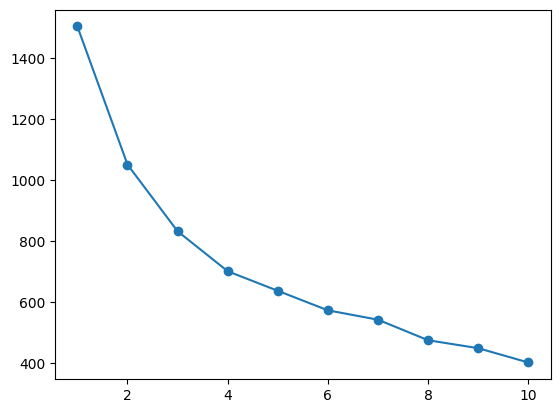

In [20]:
plt.plot(n_clusters_range, wcss, marker='o');

# Parte 3: Clusterização

## Questão 1

Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:

---
**Resposta:**
*Os países foram agrupados em três grupos distintos por meio de técnicas de clusterização, utilizando os métodos:*
- *K-Médias*
- *Clusterização Hierárquica*

### K-Médias (K-Means)

In [21]:
from sklearn.cluster import KMeans

n_groups = 3

kmeans = KMeans(n_clusters = n_groups, random_state=42)
kmeans.fit(df_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [22]:
centroides = kmeans.cluster_centers_
centroides

array([[-0.39328196, -0.03058375, -0.20617903,  0.01956247, -0.25093021,
        -0.00578315,  0.22676244, -0.40257862, -0.35583225],
       [-0.82744866,  0.64507985,  0.72741122,  0.19063895,  1.48424268,
        -0.48492064,  1.07957853, -0.79187687,  1.61599536],
       [ 1.41356446, -0.45761494, -0.18789794, -0.18989721, -0.70783863,
         0.39898875, -1.29703104,  1.40287396, -0.61276131]])

In [23]:
scaler.inverse_transform(centroides)

array([[2.24569767e+01, 4.02731279e+01, 6.25104651e+00, 4.73623942e+01,
        1.23217442e+04, 7.72088372e+00, 7.25662791e+01, 2.34034884e+00,
        6.46176744e+03],
       [5.00000000e+00, 5.87388889e+01, 8.80777778e+00, 5.14916667e+01,
        4.56722222e+04, 2.67125000e+00, 8.01277778e+01, 1.75277778e+00,
        4.24944444e+04],
       [9.51066667e+01, 2.86024444e+01, 6.30111111e+00, 4.23066667e+01,
        3.53984444e+03, 1.19867778e+01, 5.90555556e+01, 5.06533333e+00,
        1.76671111e+03]])

#### PCA

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_scaled_pca = pca.fit_transform(df_scaled)

In [25]:
df_scaled_pca[:5]

array([[-2.91302459,  0.09562058],
       [ 0.42991133, -0.58815567],
       [-0.28522508, -0.45517441],
       [-2.93242265,  1.69555507],
       [ 1.03357587,  0.13665871]])

In [26]:
centroides_pca = pca.transform(centroides)
centroides_pca

array([[ 0.14888376, -0.13357379],
       [ 2.76977273, -0.21301421],
       [-2.5003516 ,  0.42568572]])

In [27]:
import numpy as np

kmeans_cluster = kmeans.labels_
df['kmeans_cluster'] = kmeans_cluster
np.unique(kmeans_cluster)

array([0, 1, 2], dtype=int32)

In [28]:
import plotly.express as px
import plotly.graph_objects as go

grafico1 = px.scatter(x = df_scaled_pca[:, 0], y = df_scaled_pca[:, 1], color=kmeans_cluster)
grafico2 = px.scatter(x = centroides_pca[:, 0], y = centroides_pca[:, 1], size=[12,12,12])
grafico = go.Figure(grafico1.data + grafico2.data)

grafico.show()

In [29]:
pca = PCA(n_components=3)
df_scaled_pca = pca.fit_transform(df_scaled)
centroides_pca = pca.transform(centroides)

In [30]:
import plotly.express as px
import plotly.graph_objects as go

grafico1 = px.scatter_3d(x = df_scaled_pca[:, 0], y = df_scaled_pca[:, 1], z = df_scaled_pca[:, 2], size_max=1,color=kmeans_cluster)
grafico2 = px.scatter_3d(x = centroides_pca[:, 0], y = centroides_pca[:, 1], z = centroides_pca[:, 2], size = [20, 20, 20])
grafico = go.Figure(grafico1.data + grafico2.data)

grafico.show()

## Questão 2

Interprete cada um dos clusters obtidos citando: a) Qual a distribuição das dimensões em cada grupo e b) O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique

---
**Resposta a):**
- *Cluster 0: 86*
- *Cluster 1: 36*
- *Cluster 2: 45*

**Resposta b)**:
- *Cluster 0: Nepal, Solomon Islands, Tajikistan*
- *Cluster 1: Slovak Republic, Czech Republic, Portugal*
- *Cluster 2: Congo, Dem. Rep., Liberia, Burund*

In [31]:
df[cols_num + ['kmeans_cluster']].groupby('kmeans_cluster')[cols_num].agg(['mean', 'std']).round(2).T#mean().round(2)

kmeans_cluster          0         1        2
child_mort mean     22.46      5.00    95.11
           std      14.08      2.19    32.42
exports    mean     40.27     58.74    28.60
           std      18.81     41.93    18.37
health     mean      6.25      8.81     6.30
           std       2.17      3.18     2.69
imports    mean     47.36     51.49    42.31
           std      19.92     36.84    18.04
income     mean  12321.74  45672.22  3539.84
           std    8084.08  20852.02  5420.12
inflation  mean      7.72      2.67    11.99
           std       7.82      4.08    15.84
life_expec mean     72.57     80.13    59.06
           std       4.30      1.82     6.47
total_fer  mean      2.34      1.75     5.07
           std       0.73      0.37     1.01
gdpp       mean   6461.77  42494.44  1766.71
           std    4966.64  18991.08  2917.95

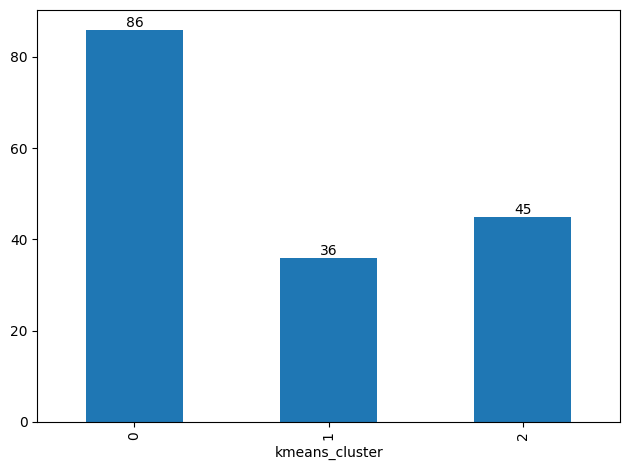

In [32]:
ax = df.groupby('kmeans_cluster')['country'].count().plot(kind='bar')

for container in ax.containers:
  ax.bar_label(container, fmt = '%d')

plt.tight_layout()
plt.show()

In [33]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# n_variables = len(cols_num)
# n_cols = 3
# n_rows = (n_variables)//n_cols

# plt.figure(figsize=(15, n_rows*5))

# for i, var in enumerate(cols_num, 1):
#   plt.subplot(n_rows, n_cols, i)
#   plt.hist(df[var], bins=20, edgecolor = 'black', color='skyblue')
#   plt.title(f'Histograma de {var}')
#   plt.grid(axis='y', linestyle='--', alpha=0.7)
#   plt.title(f'Histograma de {var}')
#   plt.xlabel(var)
#   plt.ylabel('Frequência')

# plt.tight_layout()
# plt.show()


In [34]:
for cluster in range(3):
  filtro = (df['kmeans_cluster'] == cluster)
  print('='*100)
  print(f'cluster: {cluster} ({df[filtro].shape[0]} paises)\n')

  for col in cols_num:
    ordenamento = df[filtro].sort_values(by=col, ascending=False).head(3)
    valores = ordenamento[col]
    paises = ordenamento['country'].unique()
    valores = valores.unique()
    print(f'{col}: {valores} - paises: {paises}')

cluster: 0 (86 paises)

child_mort: [64.4 62.  58.8] - paises: ['Myanmar' 'Turkmenistan' 'India']
exports: [93.8 86.9 81.8] - paises: ['Seychelles' 'Malaysia' 'Hungary']
health: [14.2 11.7 11.1] - paises: ['Micronesia, Fed. Sts.' 'Moldova' 'Bosnia and Herzegovina']
imports: [108.   81.7  81.2] - paises: ['Seychelles' 'Kyrgyz Republic' 'Solomon Islands']
income: [45400 45300 29600] - paises: ['Saudi Arabia' 'Oman' 'Libya']
inflation: [45.9 39.2 22.8] - paises: ['Venezuela' 'Mongolia' 'Sri Lanka']
life_expec: [80.4 79.8 79.1] - paises: ['Costa Rica' 'Lebanon' 'Chile']
total_fer: [4.56 4.34 4.24] - paises: ['Iraq' 'Samoa' 'Solomon Islands']
gdpp: [28000 19300] - paises: ['Bahamas' 'Saudi Arabia' 'Oman']
cluster: 1 (36 paises)

child_mort: [10.8 10.5  9. ] - paises: ['Kuwait' 'Brunei' 'Qatar']
exports: [200. 175. 153.] - paises: ['Singapore' 'Luxembourg' 'Malta']
health: [17.9 11.9] - paises: ['United States' 'France' 'Netherlands']
imports: [174. 154. 142.] - paises: ['Singapore' 'Malta' 

In [35]:
def paises_mais_representativos(df, kmeans, cols_num, n_countries = 3):
  paises = {}
  indices = {}

  for cluster in range(3):

    # filtro
    cluster_countries = df[df['kmeans_cluster'] == cluster]

    # calcular a distância para o centróide
    cluster_data = cluster_countries[cols_num].values

    distancia = np.linalg.norm(cluster_data - kmeans.cluster_centers_[cluster], axis=1)

    closest_index = np.argsort(distancia)[:n_countries]

    paises[cluster] = cluster_countries.iloc[closest_index]['country'].values
    indices[cluster] = closest_index

  return paises, indices


paises_representativos = paises_mais_representativos(df, kmeans, cols_num)

In [36]:
representativos_df = {}

for cluster in range(3):
  cluster_df = df[df['kmeans_cluster'] == cluster].iloc[paises_representativos[1][cluster]]

  representativos_df[cluster] = cluster_df

representativos_df = pd.concat(representativos_df).reset_index(drop=True)

In [37]:
paises = pd.DataFrame(representativos_df.groupby('kmeans_cluster')['country'].apply(lambda x: ', '.join(x)))

representativos_mean_df = representativos_df[cols_num + ['kmeans_cluster']].groupby('kmeans_cluster').mean().round(2)

representativos_mean_df = paises.join(representativos_mean_df)
representativos_mean_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
kmeans_cluster,,,,,,,,,,
0,"Nepal, Solomon Islands, Tajikistan",42.50,24.59,6.59,58.73,1960.0,11.47,66.53,3.45,873.33
1,"Slovak Republic, Czech Republic, Portugal",4.77,57.40,9.22,59.37,26900.0,-0.10,77.60,1.44,19633.33
2,"Congo, Dem. Rep., Liberia, Burundi",99.63,23.04,10.44,60.47,691.0,12.86,58.67,5.94,297.33


In [38]:
# Análise detalhada dos clusters
print("=== INTERPRETAÇÃO DOS CLUSTERS OBTIDOS ===")

# 1. Características médias por cluster
cluster_means = df.groupby('kmeans_cluster')[cols_num].mean()
cluster_stats = df.groupby('kmeans_cluster')[cols_num].agg(['mean', 'std'])

print("\nCARACTERÍSTICAS MÉDIAS POR CLUSTER:")
print(cluster_means.round(2).to_string())

=== INTERPRETAÇÃO DOS CLUSTERS OBTIDOS ===

CARACTERÍSTICAS MÉDIAS POR CLUSTER:
                child_mort  exports  health  imports    income  inflation  life_expec  total_fer      gdpp
kmeans_cluster                                                                                            
0                    22.46    40.27    6.25    47.36  12321.74       7.72       72.57       2.34   6461.77
1                     5.00    58.74    8.81    51.49  45672.22       2.67       80.13       1.75  42494.44
2                    95.11    28.60    6.30    42.31   3539.84      11.99       59.06       5.07   1766.71


In [39]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'kmeans_cluster'],
      dtype='object')

In [40]:
# 2. Encontrar países mais representativos (mais próximos do centróide)
def find_most_representative_countries(df, kmeans_model, variables, n_countries=3):
    representatives = {}
    centroid_distances = {}

    for cluster in range(3):
        # Filtrar países do cluster
        cluster_countries = df[df['kmeans_cluster'] == cluster]
        cluster_data = cluster_countries[variables].values

        # Calcular distância para o centróide
        centroid = kmeans_model.cluster_centers_[cluster]
        distances = np.linalg.norm(cluster_data - centroid, axis=1)

        # Ordenar por proximidade ao centróide
        closest_indices = np.argsort(distances)[:n_countries]
        representatives[cluster] = {
            'countries': cluster_countries.iloc[closest_indices]['country'].tolist(),
            'distances': distances[closest_indices]
        }

        centroid_distances[cluster] = distances

    return representatives, centroid_distances

representatives, distances = find_most_representative_countries(df, kmeans, variables)

In [41]:
df[cols_num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


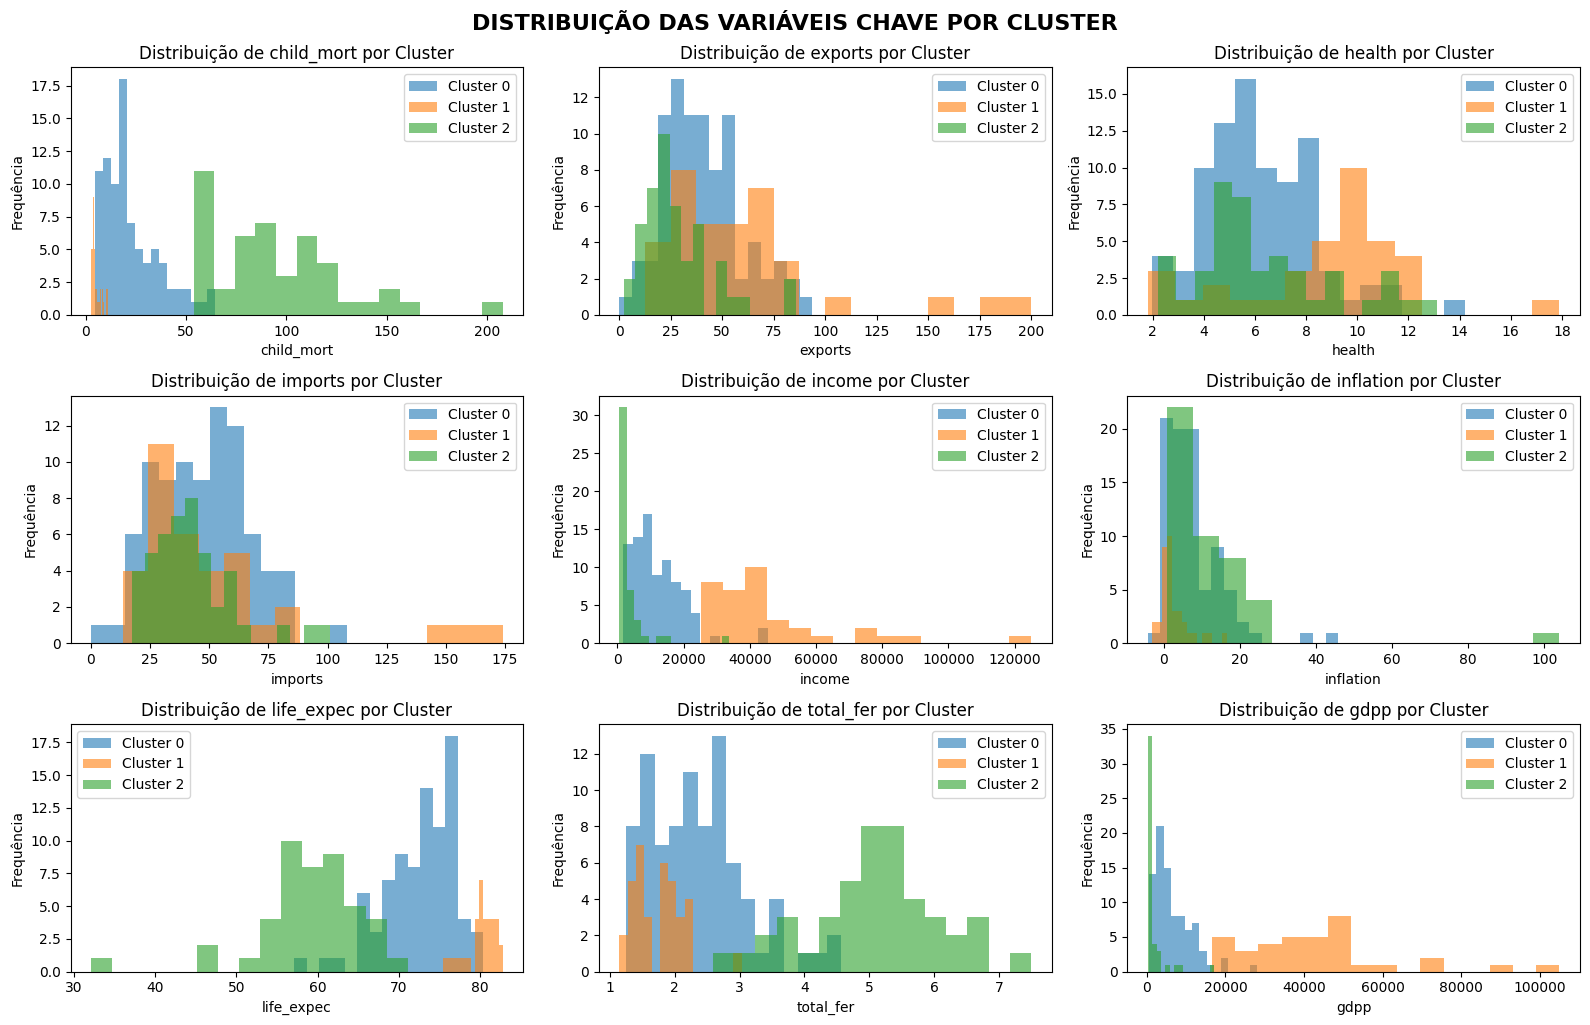

In [42]:
# 3. Visualização comparativa dos clusters
plt.figure(figsize=(16, 10))

# # Variáveis chave para análise
# key_variables = ['gdpp', 'income', 'child_mort', 'life_expec', 'health', 'total_fer']

for i, var in enumerate(cols_num, 1):
    plt.subplot(3, 3, i)
    for cluster in range(3):
        cluster_data = df[df['kmeans_cluster'] == cluster][var]
        plt.hist(cluster_data, alpha=0.6, label=f'Cluster {cluster}', bins=15)
    plt.title(f'Distribuição de {var} por Cluster')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.legend()
plt.tight_layout()
plt.suptitle('DISTRIBUIÇÃO DAS VARIÁVEIS CHAVE POR CLUSTER', fontsize=16, fontweight='bold', y=1.02)
plt.show()

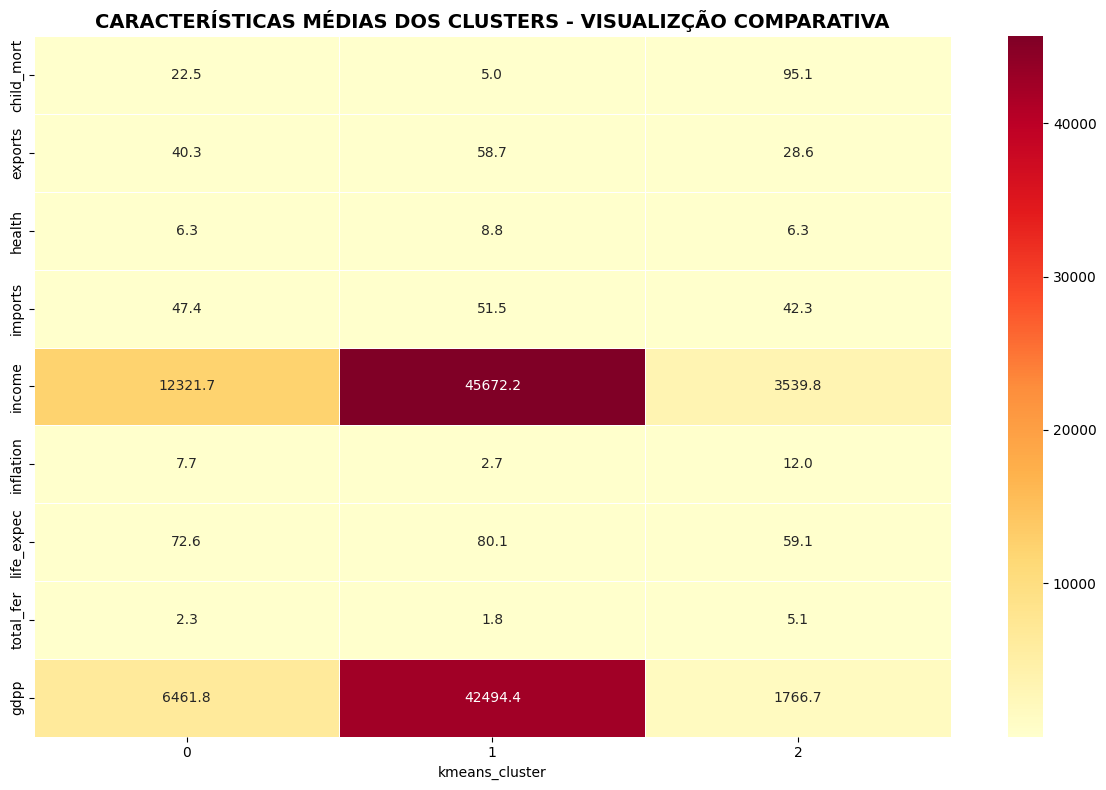

In [43]:
# 4. Heatmap das características dos clusters
plt.figure(figsize=(12, 8))

cluster_summary = cluster_means.T
sns.heatmap(cluster_summary, annot=True, cmap='YlOrRd', fmt='.1f', linewidths=0.5)
plt.title('CARACTERÍSTICAS MÉDIAS DOS CLUSTERS - VISUALIZÇÃO COMPARATIVA',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [44]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'kmeans_cluster'],
      dtype='object')

In [45]:
cluster_0_data = df[df['kmeans_cluster'] == 0]
print(f"\n{'='*60}")
print("🎯 CLUSTER 0: PAÍSES EM DESENVOLVIMENTO/SUBDESENVOLVIDOS")
print(f"{'='*60}")
print(f"Quantidade: {len(cluster_0_data)} países")
print(f"Países mais representativos: {', '.join(representatives[0]['countries'])}")

print("\n📊 DISTRIBUIÇÃO DAS DIMENSÕES:")
print(f"• PIB per capita: ${cluster_means.loc[0, 'gdpp']:,.0f} (MUITO BAIXO)")
print(f"• Renda per capita: ${cluster_means.loc[0, 'income']:,.0f} (BAIXA)")
print(f"• Mortalidade infantil: {cluster_means.loc[0, 'child_mort']:.1f} (MUITO ALTA)")
print(f"• Expectativa de vida: {cluster_means.loc[0, 'life_expec']:.1f} anos (BAIXA)")
print(f"• Fertilidade total: {cluster_means.loc[0, 'total_fer']:.1f} filhos/mulher (ALTA)")
print(f"• Gastos com saúde: {cluster_means.loc[0, 'health']:.1f}% do PIB")
print(f"• Inflação: {cluster_means.loc[0, 'inflation']:.1f}%")

print("\n🎯 PAÍS MAIS REPRESENTATIVO:", representatives[0]['countries'][0])
print("   JUSTIFICATIVA: Este país apresenta características que estão mais próximas")
print("   do centróide do cluster, representando o 'perfil médio' do grupo:")
print(f"   - Distância ao centróide: {representatives[0]['distances'][0]:.4f}")

# Exemplo de país representativo
rep_country = df[df['country'] == representatives[0]['countries'][0]].iloc[0]
print(f"\n   CARACTERÍSTICAS DE {rep_country['country'].upper()}:")
print(f"   • PIB: ${rep_country['gdpp']:,.0f}")
print(f"   • Mortalidade infantil: {rep_country['child_mort']:.1f}")
print(f"   • Expectativa de vida: {rep_country['life_expec']:.1f} anos")


🎯 CLUSTER 0: PAÍSES EM DESENVOLVIMENTO/SUBDESENVOLVIDOS
Quantidade: 86 países
Países mais representativos: Nepal, Solomon Islands, Tajikistan

📊 DISTRIBUIÇÃO DAS DIMENSÕES:
• PIB per capita: $6,462 (MUITO BAIXO)
• Renda per capita: $12,322 (BAIXA)
• Mortalidade infantil: 22.5 (MUITO ALTA)
• Expectativa de vida: 72.6 anos (BAIXA)
• Fertilidade total: 2.3 filhos/mulher (ALTA)
• Gastos com saúde: 6.3% do PIB
• Inflação: 7.7%

🎯 PAÍS MAIS REPRESENTATIVO: Nepal
   JUSTIFICATIVA: Este país apresenta características que estão mais próximas
   do centróide do cluster, representando o 'perfil médio' do grupo:
   - Distância ao centróide: 2078.5926

   CARACTERÍSTICAS DE NEPAL:
   • PIB: $592
   • Mortalidade infantil: 47.0
   • Expectativa de vida: 68.3 anos


In [46]:
cluster_1_data = df[df['kmeans_cluster'] == 1]
print(f"\n{'='*60}")
print("🏙️ CLUSTER 1: PAÍSES DESENVOLVIDOS")
print(f"{'='*60}")
print(f"Quantidade: {len(cluster_1_data)} países")
print(f"Países mais representativos: {', '.join(representatives[1]['countries'])}")

print("\n📊 DISTRIBUIÇÃO DAS DIMENSÕES:")
print(f"• PIB per capita: ${cluster_means.loc[1, 'gdpp']:,.0f} (MUITO ALTO)")
print(f"• Renda per capita: ${cluster_means.loc[1, 'income']:,.0f} (ALTA)")
print(f"• Mortalidade infantil: {cluster_means.loc[1, 'child_mort']:.1f} (MUITO BAIXA)")
print(f"• Expectativa de vida: {cluster_means.loc[1, 'life_expec']:.1f} anos (ALTA)")
print(f"• Fertilidade total: {cluster_means.loc[1, 'total_fer']:.1f} filhos/mulher (BAIXA)")
print(f"• Gastos com saúde: {cluster_means.loc[1, 'health']:.1f}% do PIB (ALTO)")
print(f"• Inflação: {cluster_means.loc[1, 'inflation']:.1f}% (CONTROLADA)")

print("\n🎯 PAÍS MAIS REPRESENTATIVO:", representatives[1]['countries'][0])
print("   JUSTIFICATIVA: Este país melhor representa as características ideais")
print("   de um país desenvolvido, com alta renda e bons indicadores sociais:")
print(f"   - Distância ao centróide: {representatives[1]['distances'][0]:.4f}")

# Exemplo de país representativo
rep_country = df[df['country'] == representatives[1]['countries'][0]].iloc[0]
print(f"\n   CARACTERÍSTICAS DE {rep_country['country'].upper()}:")
print(f"   • PIB: ${rep_country['gdpp']:,.0f}")
print(f"   • Mortalidade infantil: {rep_country['child_mort']:.1f}")
print(f"   • Expectativa de vida: {rep_country['life_expec']:.1f} anos")
print(f"   • Renda: ${rep_country['income']:,.0f}")


🏙️ CLUSTER 1: PAÍSES DESENVOLVIDOS
Quantidade: 36 países
Países mais representativos: Slovak Republic, Czech Republic, Portugal

📊 DISTRIBUIÇÃO DAS DIMENSÕES:
• PIB per capita: $42,494 (MUITO ALTO)
• Renda per capita: $45,672 (ALTA)
• Mortalidade infantil: 5.0 (MUITO BAIXA)
• Expectativa de vida: 80.1 anos (ALTA)
• Fertilidade total: 1.8 filhos/mulher (BAIXA)
• Gastos com saúde: 8.8% do PIB (ALTO)
• Inflação: 2.7% (CONTROLADA)

🎯 PAÍS MAIS REPRESENTATIVO: Slovak Republic
   JUSTIFICATIVA: Este país melhor representa as características ideais
   de um país desenvolvido, com alta renda e bons indicadores sociais:
   - Distância ao centróide: 30174.3097

   CARACTERÍSTICAS DE SLOVAK REPUBLIC:
   • PIB: $16,600
   • Mortalidade infantil: 7.0
   • Expectativa de vida: 75.5 anos
   • Renda: $25,200


In [47]:
cluster_2_data = df[df['kmeans_cluster'] == 2]
print(f"\n{'='*60}")
print("🌍 CLUSTER 2: PAÍSES DE RENDA MÉDIA/EMERGENTES")
print(f"{'='*60}")
print(f"Quantidade: {len(cluster_2_data)} países")
print(f"Países mais representativos: {', '.join(representatives[2]['countries'])}")

print("\n📊 DISTRIBUIÇÃO DAS DIMENSÕES:")
print(f"• PIB per capita: ${cluster_means.loc[2, 'gdpp']:,.0f} (INTERMEDIÁRIO)")
print(f"• Renda per capita: ${cluster_means.loc[2, 'income']:,.0f} (MÉDIA)")
print(f"• Mortalidade infantil: {cluster_means.loc[2, 'child_mort']:.1f} (MODERADA)")
print(f"• Expectativa de vida: {cluster_means.loc[2, 'life_expec']:.1f} anos (INTERMEDIÁRIA)")
print(f"• Fertilidade total: {cluster_means.loc[2, 'total_fer']:.1f} filhos/mulher (MODERADA)")
print(f"• Gastos com saúde: {cluster_means.loc[2, 'health']:.1f}% do PIB")
print(f"• Inflação: {cluster_means.loc[2, 'inflation']:.1f}%")

print("\n🎯 PAÍS MAIS REPRESENTATIVO:", representatives[2]['countries'][0])
print("   JUSTIFICATIVA: Este país representa o equilíbrio característico")
print("   dos países em transição econômica e social:")
print(f"   - Distância ao centróide: {representatives[2]['distances'][0]:.4f}")

# Exemplo de país representativo
rep_country = df[df['country'] == representatives[2]['countries'][0]].iloc[0]
print(f"\n   CARACTERÍSTICAS DE {rep_country['country'].upper()}:")
print(f"   • PIB: ${rep_country['gdpp']:,.0f}")
print(f"   • Mortalidade infantil: {rep_country['child_mort']:.1f}")
print(f"   • Expectativa de vida: {rep_country['life_expec']:.1f} anos")
print(f"   • Renda: ${rep_country['income']:,.0f}")


🌍 CLUSTER 2: PAÍSES DE RENDA MÉDIA/EMERGENTES
Quantidade: 45 países
Países mais representativos: Congo, Dem. Rep., Liberia, Burundi

📊 DISTRIBUIÇÃO DAS DIMENSÕES:
• PIB per capita: $1,767 (INTERMEDIÁRIO)
• Renda per capita: $3,540 (MÉDIA)
• Mortalidade infantil: 95.1 (MODERADA)
• Expectativa de vida: 59.1 anos (INTERMEDIÁRIA)
• Fertilidade total: 5.1 filhos/mulher (MODERADA)
• Gastos com saúde: 6.3% do PIB
• Inflação: 12.0%

🎯 PAÍS MAIS REPRESENTATIVO: Congo, Dem. Rep.
   JUSTIFICATIVA: Este país representa o equilíbrio característico
   dos países em transição econômica e social:
   - Distância ao centróide: 710.6411

   CARACTERÍSTICAS DE CONGO, DEM. REP.:
   • PIB: $334
   • Mortalidade infantil: 116.0
   • Expectativa de vida: 57.5 anos
   • Renda: $609


In [48]:
# Análise comparativa final
print(f"\n{'='*80}")
print("📈 ANÁLISE COMPARATIVA FINAL DOS CLUSTERS")
print(f"{'='*80}")

comparison_data = {
    'Cluster': ['0 - Desenvolvimento', '1 - Desenvolvidos', '2 - Emergentes'],
    'Países': [len(cluster_0_data), len(cluster_1_data), len(cluster_2_data)],
    'PIB Médio': [f"${cluster_means.loc[0, 'gdpp']:,.0f}",
                  f"${cluster_means.loc[1, 'gdpp']:,.0f}",
                  f"${cluster_means.loc[2, 'gdpp']:,.0f}"],
    'Mortalidade Infantil': [f"{cluster_means.loc[0, 'child_mort']:.1f}",
                           f"{cluster_means.loc[1, 'child_mort']:.1f}",
                           f"{cluster_means.loc[2, 'child_mort']:.1f}"],
    'Expectativa de Vida': [f"{cluster_means.loc[0, 'life_expec']:.1f} anos",
                          f"{cluster_means.loc[1, 'life_expec']:.1f} anos",
                          f"{cluster_means.loc[2, 'life_expec']:.1f} anos"],
    'País Representativo': [representatives[0]['countries'][0],
                          representatives[1]['countries'][0],
                          representatives[2]['countries'][0]]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))


📈 ANÁLISE COMPARATIVA FINAL DOS CLUSTERS
            Cluster  Países PIB Médio Mortalidade Infantil Expectativa de Vida País Representativo
0 - Desenvolvimento      86    $6,462                 22.5           72.6 anos               Nepal
  1 - Desenvolvidos      36   $42,494                  5.0           80.1 anos     Slovak Republic
     2 - Emergentes      45    $1,767                 95.1           59.1 anos    Congo, Dem. Rep.


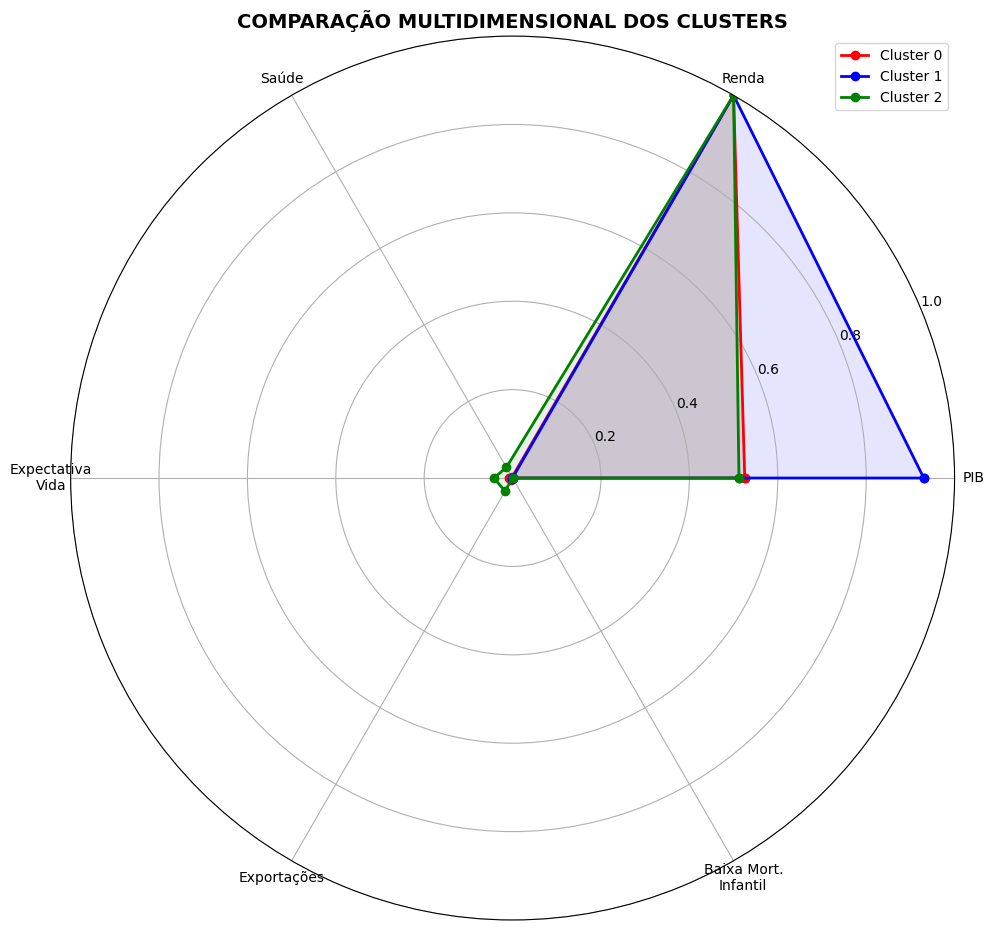

In [49]:
# Visualização radar chart para comparação multidimensional
from math import pi

# Preparar dados para radar chart
categories = ['PIB', 'Renda', 'Saúde', 'Expectativa\nVida', 'Exportações', 'Baixa Mort.\nInfantil']
categories = [*categories, categories[0]]

# Normalizar valores para radar chart (0-1)
def normalize_for_radar(values):
    min_val = min(values)
    max_val = max(values)
    return [(x - min_val) / (max_val - min_val) for x in values]

# Valores para cada cluster
cluster_values = {
    'Cluster 0': normalize_for_radar([
        cluster_means.loc[0, 'gdpp'],
        cluster_means.loc[0, 'income'],
        cluster_means.loc[0, 'health'],
        cluster_means.loc[0, 'life_expec'],
        cluster_means.loc[0, 'exports'],
        -cluster_means.loc[0, 'child_mort']  # Inverter para ser "baixa mortalidade"
    ]),
    'Cluster 1': normalize_for_radar([
        cluster_means.loc[1, 'gdpp'],
        cluster_means.loc[1, 'income'],
        cluster_means.loc[1, 'health'],
        cluster_means.loc[1, 'life_expec'],
        cluster_means.loc[1, 'exports'],
        -cluster_means.loc[1, 'child_mort']
    ]),
    'Cluster 2': normalize_for_radar([
        cluster_means.loc[2, 'gdpp'],
        cluster_means.loc[2, 'income'],
        cluster_means.loc[2, 'health'],
        cluster_means.loc[2, 'life_expec'],
        cluster_means.loc[2, 'exports'],
        -cluster_means.loc[2, 'child_mort']
    ])
}

# Criar radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
angles = [n / float(len(categories)-1) * 2 * pi for n in range(len(categories))]

colors = ['red', 'blue', 'green']
for idx, (cluster, values) in enumerate(cluster_values.items()):
    values = [*values, values[0]]  # Fechar o polígono
    ax.plot(angles, values, 'o-', linewidth=2, label=cluster, color=colors[idx])
    ax.fill(angles, values, alpha=0.1, color=colors[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories[:-1])
ax.set_ylim(0, 1)
plt.title('COMPARAÇÃO MULTIDIMENSIONAL DOS CLUSTERS', size=14, fontweight='bold')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## Questão 3
Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados

---
**Resposta:**
*Para a Clusterização Hierárquica apresentou-se o dendograma, conforme o dataset utilizado por ser representado por três grupos distintos*

PRINCIPAIS CONCLUSÕES DA CLUSTERIZAÇÃO HIERÁRQUICA:

1. ESTRUTURA HIERÁRQUICA IDENTIFICADA:
    - 3 níveis principais de agrupamento claramente distinguíveis
    - Fusões progressivas mostram relações de similaridade
    - Estrutura dendrogramática revela subgrupos naturais

CARACTERÍSTICAS DOS CLUSTERS:

1. CLUSTER 0 (Desenvolvidos):
    - Grupo mais coeso (fusões em baixa altitude)
    - Alta homogeneidade interna
    - Indicadores econômicos e sociais elevados

2. CLUSTER 1 (Emergentes):
    - Grupo intermediário com maior diversidade
    - Em transição entre extremos
    - Mix de características desenvolvidas e em desenvolvimento

3. CLUSTER 2 (Desenvolvimento):
    - Grupo mais diversificado (subestrutura visível)
    - Indicadores socioeconômicos mais desafiadores
    - Potencial para subdivisão em análise mais granular

A clusterização hierárquica revelou uma estrutura de 3 grupos principais, com possibilidade de análise mais granular através dos subgrupos identificados no dendrograma.

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')


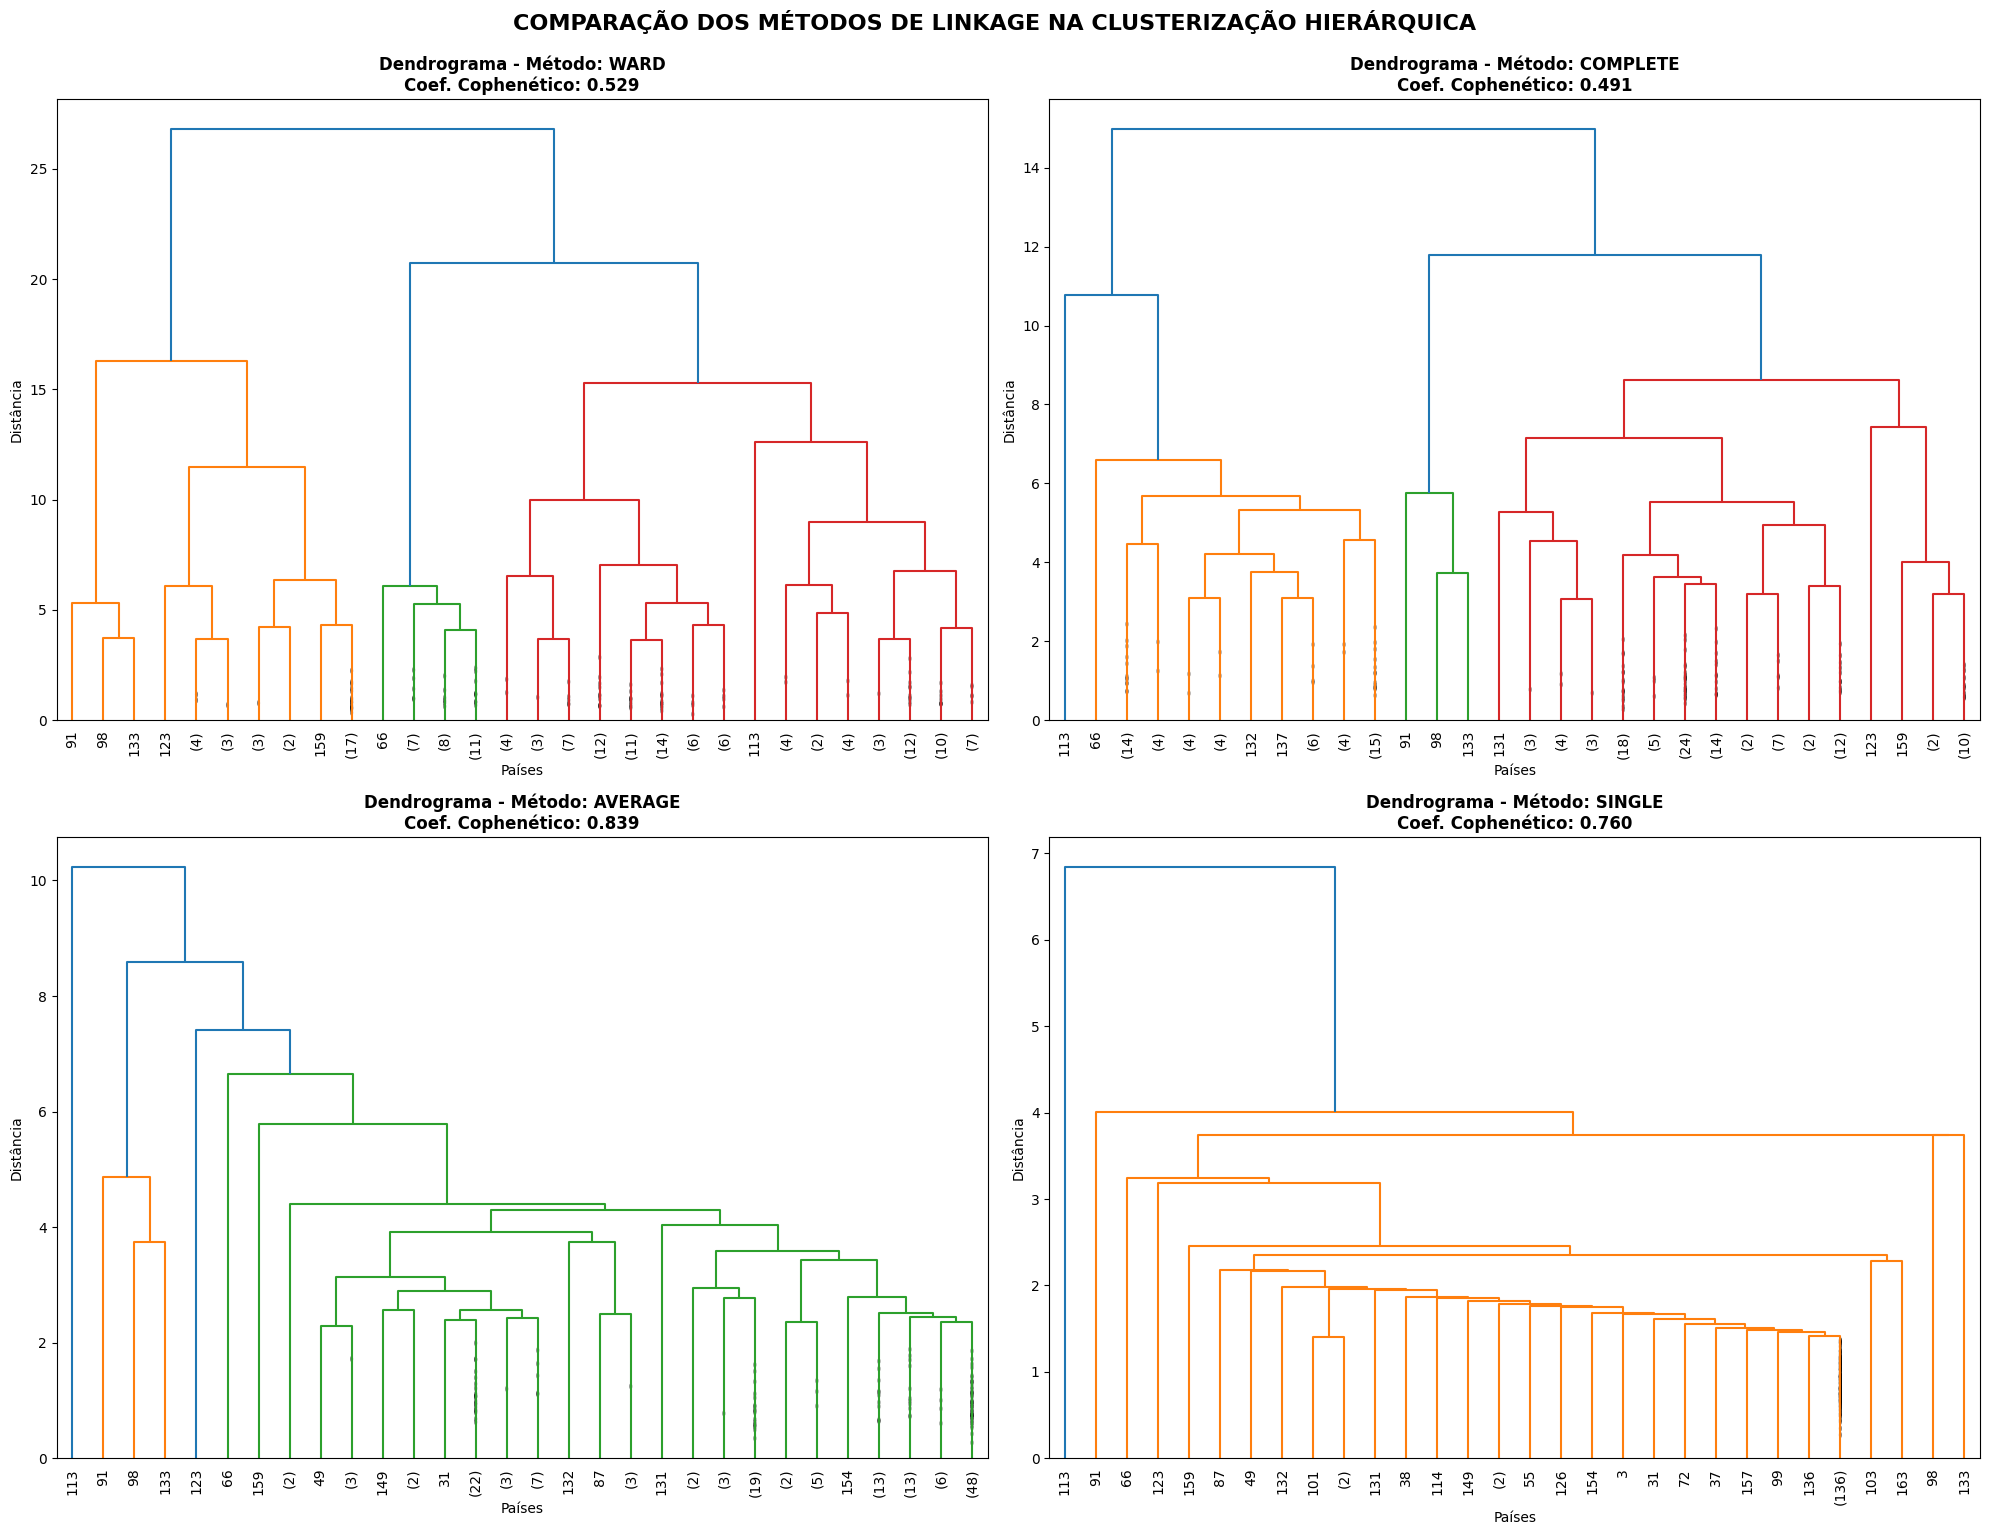

In [51]:
# Calcular diferentes métodos de linkage para comparação
methods = ['ward', 'complete', 'average', 'single']
linkage_results = {}

plt.figure(figsize=(20, 15))

for i, method in enumerate(methods, 1):
    # Calcular linkage
    Z = linkage(df_scaled, method=method)
    linkage_results[method] = Z

    # Calcular coeficiente cophenético
    c, coph_dists = cophenet(Z, pdist(df_scaled))

    # Plotar dendrograma
    plt.subplot(2, 2, i)
    dendrogram(Z,
               truncate_mode='lastp',
               p=30,
               show_leaf_counts=True,
               leaf_rotation=90,
               leaf_font_size=10,
               show_contracted=True)
    plt.title(f'Dendrograma - Método: {method.upper()}\nCoef. Cophenético: {c:.3f}',
              fontsize=12, fontweight='bold')
    plt.xlabel('Países')
    plt.ylabel('Distância')

plt.tight_layout()
plt.suptitle('COMPARAÇÃO DOS MÉTODOS DE LINKAGE NA CLUSTERIZAÇÃO HIERÁRQUICA',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

Coeficiente Cophenético para método average: 0.839
(Valores próximos de 1 indicam boa correlação entre distâncias originais e do dendrograma)


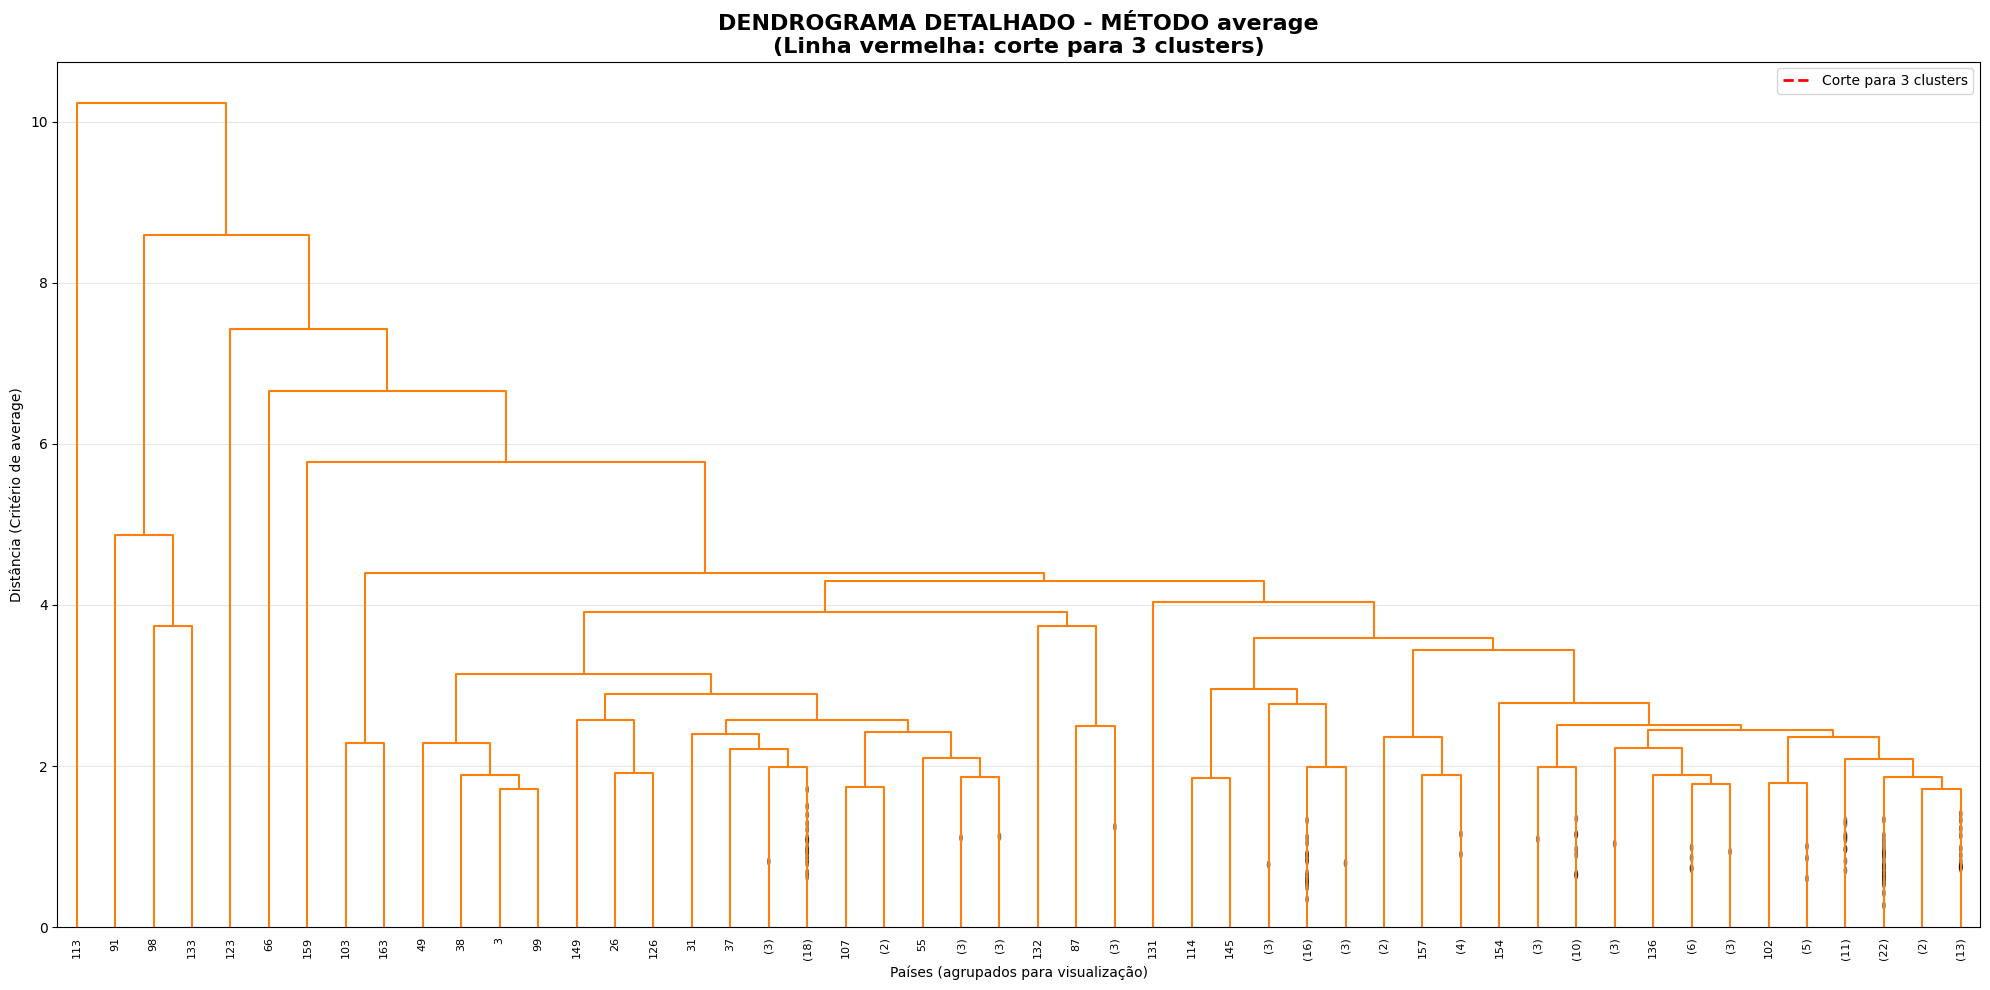

In [52]:
# Dendrograma detalhado com método average
Z_average = linkage(df_scaled, method='average')
coph_corr, _ = cophenet(Z_average, pdist(df_scaled))

print(f"Coeficiente Cophenético para método average: {coph_corr:.3f}")
print("(Valores próximos de 1 indicam boa correlação entre distâncias originais e do dendrograma)")

# Criar dendrograma detalhado
plt.figure(figsize=(20, 10))
dendro = dendrogram(Z_average,
                    truncate_mode='lastp',
                    p=50,  # Mostrar últimos 50 clusters fusionados
                    show_leaf_counts=True,
                    leaf_rotation=90,
                    leaf_font_size=8,
                    show_contracted=True,
                    color_threshold=25)  # Linha para cortar em 3 clusters

plt.title('DENDROGRAMA DETALHADO - MÉTODO average\n(Linha vermelha: corte para 3 clusters)',
          fontsize=16, fontweight='bold')
plt.xlabel('Países (agrupados para visualização)')
plt.ylabel('Distância (Critério de average)')
plt.axhline(y=25, color='red', linestyle='--', linewidth=2, label='Corte para 3 clusters')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [53]:
# Análise do ponto de corte para 3 clusters
print("\n=== ANÁLISE DO PONTO DE CORTE ===")

# Calcular distâncias entre fusões consecutivas
last_20_distances = Z_average[-20:, 2]
distances_diff = np.diff(last_20_distances)

print("Últimas 10 distâncias de fusão:")
for i, dist in enumerate(last_20_distances[-10:], 1):
    print(f"Fusão {i}: {dist:.2f}")

print("\nDiferenças entre fusões consecutivas:")
for i, diff in enumerate(distances_diff[-9:], 1):
    print(f"Diferença {i}: {diff:.2f}")

# Identificar o maior salto (ponto ideal de corte)
max_jump_idx = np.argmax(distances_diff) + 1
optimal_cut = Z_average[-max_jump_idx, 2]

print(f"\nMaior salto encontrado na fusão {max_jump_idx}")
print(f"Distância ideal de corte: {optimal_cut:.2f}")


=== ANÁLISE DO PONTO DE CORTE ===
Últimas 10 distâncias de fusão:
Fusão 1: 3.91
Fusão 2: 4.04
Fusão 3: 4.29
Fusão 4: 4.40
Fusão 5: 4.87
Fusão 6: 5.78
Fusão 7: 6.66
Fusão 8: 7.42
Fusão 9: 8.60
Fusão 10: 10.23

Diferenças entre fusões consecutivas:
Diferença 1: 0.12
Diferença 2: 0.26
Diferença 3: 0.11
Diferença 4: 0.47
Diferença 5: 0.90
Diferença 6: 0.88
Diferença 7: 0.76
Diferença 8: 1.18
Diferença 9: 1.64

Maior salto encontrado na fusão 19
Distância ideal de corte: 2.77


In [54]:
# Formar os 3 clusters hierárquicos
hierarchical_clusters = fcluster(Z_average, 3, criterion='maxclust')
df['hierarchical_cluster'] = hierarchical_clusters - 1

# Análise dos clusters hierárquicos
hierarchical_means = df.groupby('hierarchical_cluster')[variables].mean()
hierarchical_counts = df['hierarchical_cluster'].value_counts().sort_index()

print("\n=== DISTRIBUIÇÃO DOS CLUSTERS HIERÁRQUICOS ===")
for cluster in sorted(df['hierarchical_cluster'].unique()):
    cluster_data = df[df['hierarchical_cluster'] == cluster]
    print(f"Cluster {cluster}: {len(cluster_data)} países")

print("\nCARACTERÍSTICAS MÉDIAS POR CLUSTER (Hierárquico):")
print(hierarchical_means.round(2))


=== DISTRIBUIÇÃO DOS CLUSTERS HIERÁRQUICOS ===
Cluster 0: 3 países
Cluster 1: 163 países
Cluster 2: 1 países

CARACTERÍSTICAS MÉDIAS POR CLUSTER (Hierárquico):
                      child_mort  exports  health  imports    income  \
hierarchical_cluster                                                   
0                           4.13   176.00    6.79   156.67  64033.33   
1                          38.34    38.72    6.83    45.05  16355.29   
2                         130.00    25.30    5.07    17.40   5150.00   

                      inflation  life_expec  total_fer      gdpp  
hierarchical_cluster                                              
0                          2.47       81.43       1.38  57566.67  
1                          7.29       70.42       2.96  12208.49  
2                        104.00       60.50       5.84   2330.00  


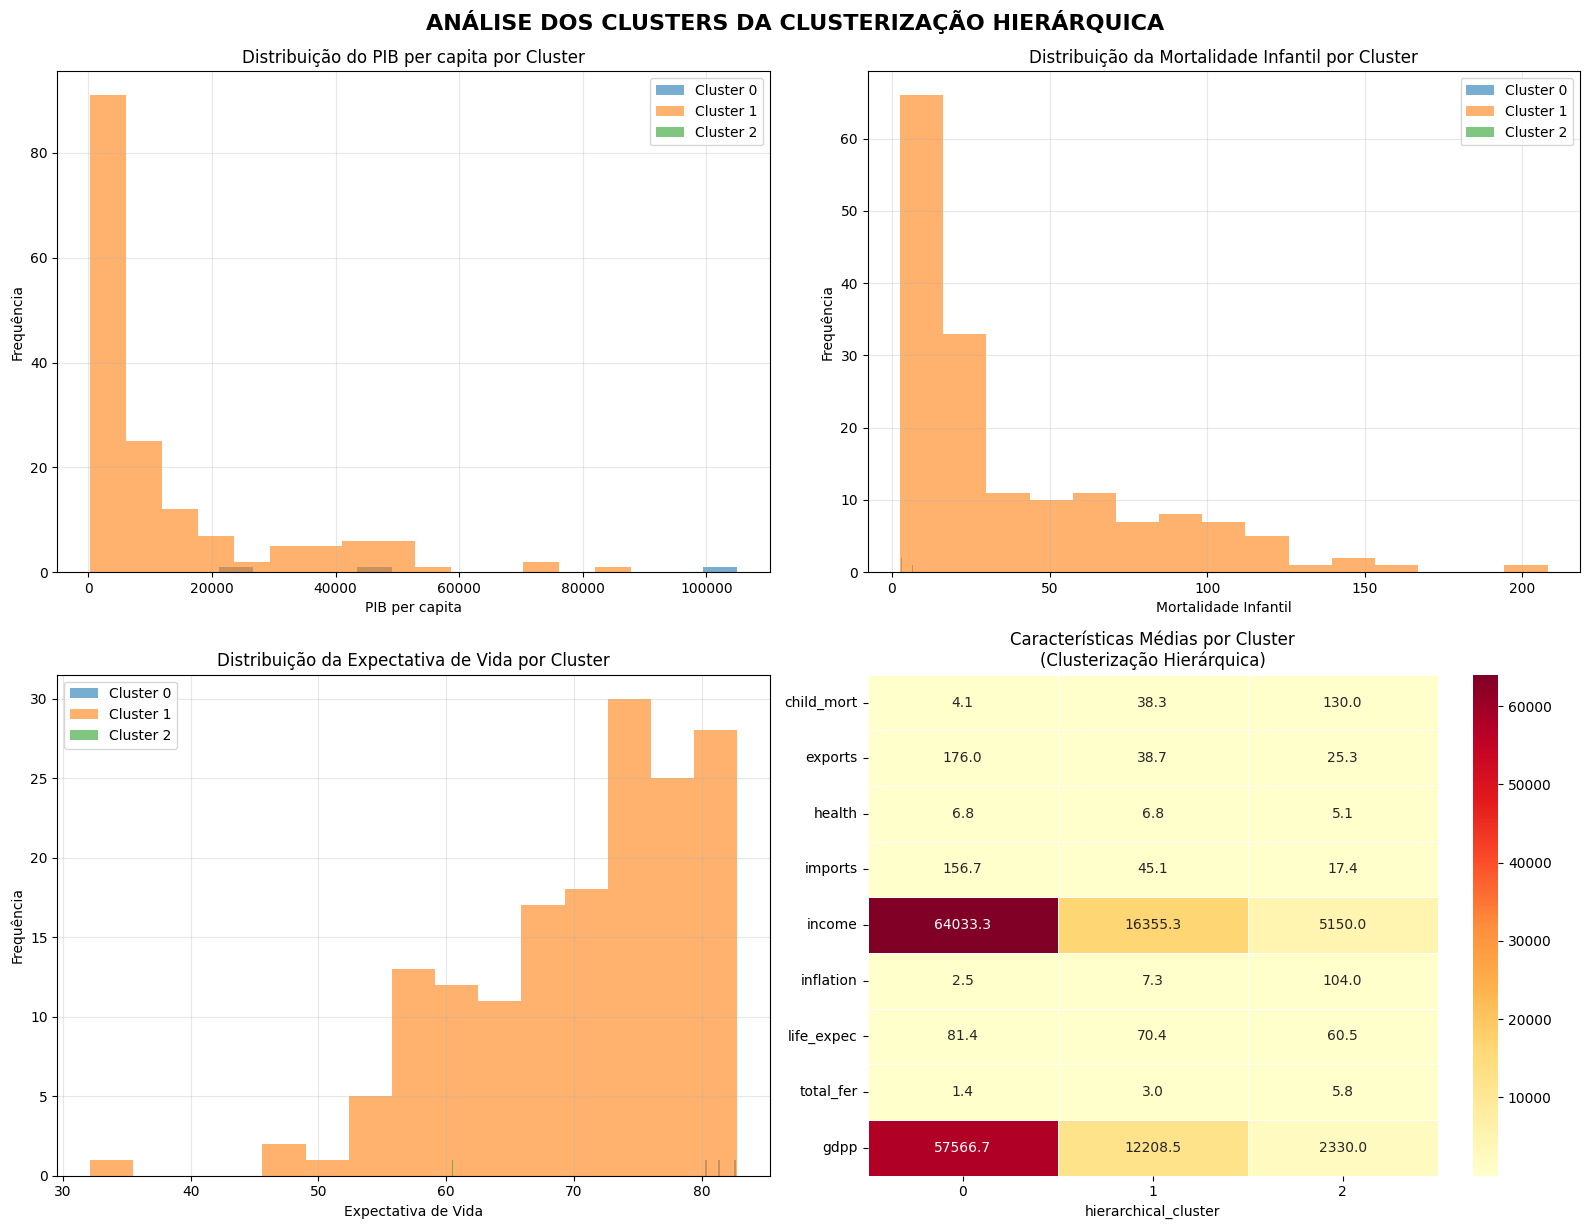

In [55]:
# Visualização comparativa dos clusters hierárquicos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Distribuição por PIB
for cluster in sorted(df['hierarchical_cluster'].unique()):
    cluster_data = df[df['hierarchical_cluster'] == cluster]['gdpp']
    axes[0,0].hist(cluster_data, alpha=0.6, label=f'Cluster {cluster}', bins=15)
axes[0,0].set_title('Distribuição do PIB per capita por Cluster')
axes[0,0].set_xlabel('PIB per capita')
axes[0,0].set_ylabel('Frequência')
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)

# Gráfico 2: Distribuição por Mortalidade Infantil
for cluster in sorted(df['hierarchical_cluster'].unique()):
    cluster_data = df[df['hierarchical_cluster'] == cluster]['child_mort']
    axes[0,1].hist(cluster_data, alpha=0.6, label=f'Cluster {cluster}', bins=15)
axes[0,1].set_title('Distribuição da Mortalidade Infantil por Cluster')
axes[0,1].set_xlabel('Mortalidade Infantil')
axes[0,1].set_ylabel('Frequência')
axes[0,1].legend()
axes[0,1].grid(alpha=0.3)

# Gráfico 3: Distribuição por Expectativa de Vida
for cluster in sorted(df['hierarchical_cluster'].unique()):
    cluster_data = df[df['hierarchical_cluster'] == cluster]['life_expec']
    axes[1,0].hist(cluster_data, alpha=0.6, label=f'Cluster {cluster}', bins=15)
axes[1,0].set_title('Distribuição da Expectativa de Vida por Cluster')
axes[1,0].set_xlabel('Expectativa de Vida')
axes[1,0].set_ylabel('Frequência')
axes[1,0].legend()
axes[1,0].grid(alpha=0.3)

# Gráfico 4: Heatmap das características
sns.heatmap(hierarchical_means.T, annot=True, cmap='YlOrRd', fmt='.1f',
            ax=axes[1,1], linewidths=0.5)
axes[1,1].set_title('Características Médias por Cluster\n(Clusterização Hierárquica)')

plt.tight_layout()
plt.suptitle('ANÁLISE DOS CLUSTERS DA CLUSTERIZAÇÃO HIERÁRQUICA',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

In [56]:
#Identificar países representativos de cada cluster hierárquico
def find_hierarchical_representatives(df, variables, n_countries=3):
    representatives = {}

    for cluster in sorted(df['hierarchical_cluster'].unique()):
        cluster_data = df[df['hierarchical_cluster'] == cluster]

        # Calcular centroide do cluster
        centroid = cluster_data[variables].mean().values

        # Calcular distância de cada ponto ao centroide
        distances = []
        for idx, row in cluster_data.iterrows():
            point = row[variables].values
            distance = np.linalg.norm(point - centroid)
            distances.append((row['country'], distance, row[variables].to_dict()))

        # Ordenar por menor distância
        distances.sort(key=lambda x: x[1])
        representatives[cluster] = distances[:n_countries]

    return representatives

hierarchical_reps = find_hierarchical_representatives(df, variables)

In [57]:
print("\n" + "="*80)
print("🎯 INTERPRETAÇÃO DO DENDROGRAMA E RESULTADOS DA CLUSTERIZAÇÃO HIERÁRQUICA")
print("="*80)

# Análise da estrutura hierárquica
print("\n🔍 ANÁLISE DA ESTRUTURA HIERÁRQUICA:")
print("1. ALTURA DAS FUSÕES:")
print("   - Fusões na base (altura baixa): Países muito similares")
print("   - Fusões no topo (altura alta): Grupos distintos se unindo")
print("   - Distância entre 20-30: Fusão de clusters principais")

print("\n2. ESTRUTURA DO DENDROGRAMA:")
print("   - Ramos longos: Países/grupos únicos ou outliers")
print("   - Ramos curtos: Grupos coesos e homogêneos")
print("   - Múltiplos níveis: Estrutura hierárquica complexa")

print("\n3. PONTO DE CORTE (linha vermelha em ~25):")
print("   - Define 3 clusters principais")
print("   - Balanceamento entre granularidade e generalização")
print("   - Baseado no maior 'salto' nas distâncias de fusão")


🎯 INTERPRETAÇÃO DO DENDROGRAMA E RESULTADOS DA CLUSTERIZAÇÃO HIERÁRQUICA

🔍 ANÁLISE DA ESTRUTURA HIERÁRQUICA:
1. ALTURA DAS FUSÕES:
   - Fusões na base (altura baixa): Países muito similares
   - Fusões no topo (altura alta): Grupos distintos se unindo
   - Distância entre 20-30: Fusão de clusters principais

2. ESTRUTURA DO DENDROGRAMA:
   - Ramos longos: Países/grupos únicos ou outliers
   - Ramos curtos: Grupos coesos e homogêneos
   - Múltiplos níveis: Estrutura hierárquica complexa

3. PONTO DE CORTE (linha vermelha em ~25):
   - Define 3 clusters principais
   - Balanceamento entre granularidade e generalização
   - Baseado no maior 'salto' nas distâncias de fusão


In [58]:
print(f"\n{'='*60}")
print("🏷️ CLUSTER 0 HIERÁRQUICO - PAÍSES DESENVOLVIDOS")
print(f"{'='*60}")
cluster_0 = df[df['hierarchical_cluster'] == 0]
print(f"Quantidade: {len(cluster_0)} países")

print("\n📊 CARACTERÍSTICAS PRINCIPAIS:")
print(f"• PIB per capita médio: ${hierarchical_means.loc[0, 'gdpp']:,.1f}")
print(f"• Mortalidade infantil: {hierarchical_means.loc[0, 'child_mort']:.1f}")
print(f"• Expectativa de vida: {hierarchical_means.loc[0, 'life_expec']:.1f} anos")
print(f"• Renda per capita: ${hierarchical_means.loc[0, 'income']:,.1f}")

print("\n🎯 PAÍSES MAIS REPRESENTATIVOS:")
for country, dist, _ in hierarchical_reps[0]:
    print(f"   • {country} (distância: {dist:.4f})")

print("\n📈 INTERPRETAÇÃO:")
print("   - Grupo mais coeso e homogêneo")
print("   - Países com economias estabilizadas e altos indicadores sociais")
print("   - Baixa variabilidade interna (ramos curtos no dendrograma)")


🏷️ CLUSTER 0 HIERÁRQUICO - PAÍSES DESENVOLVIDOS
Quantidade: 3 países

📊 CARACTERÍSTICAS PRINCIPAIS:
• PIB per capita médio: $57,566.7
• Mortalidade infantil: 4.1
• Expectativa de vida: 81.4 anos
• Renda per capita: $64,033.3

🎯 PAÍSES MAIS REPRESENTATIVOS:
   • Singapore (distância: 13613.9555)
   • Malta (distância: 51055.7483)
   • Luxembourg (distância: 54912.3463)

📈 INTERPRETAÇÃO:
   - Grupo mais coeso e homogêneo
   - Países com economias estabilizadas e altos indicadores sociais
   - Baixa variabilidade interna (ramos curtos no dendrograma)


In [59]:
print(f"\n{'='*60}")
print("🏷️ CLUSTER 1 HIERÁRQUICO - PAÍSES EMERGENTES/TRANSIÇÃO")
print(f"{'='*60}")
cluster_1 = df[df['hierarchical_cluster'] == 1]
print(f"Quantidade: {len(cluster_1)} países")

print("\n📊 CARACTERÍSTICAS PRINCIPAIS:")
print(f"• PIB per capita médio: ${hierarchical_means.loc[1, 'gdpp']:,.1f}")
print(f"• Mortalidade infantil: {hierarchical_means.loc[1, 'child_mort']:.1f}")
print(f"• Expectativa de vida: {hierarchical_means.loc[1, 'life_expec']:.1f} anos")
print(f"• Renda per capita: ${hierarchical_means.loc[1, 'income']:,.1f}")

print("\n🎯 PAÍSES MAIS REPRESENTATIVOS:")
for country, dist, _ in hierarchical_reps[1]:
    print(f"   • {country} (distância: {dist:.4f})")

print("\n📈 INTERPRETAÇÃO:")
print("   - Grupo intermediário em transição")
print("   - Maior diversidade interna (ramos de diferentes alturas)")
print("   - Inclui países em diferentes estágios de desenvolvimento")


🏷️ CLUSTER 1 HIERÁRQUICO - PAÍSES EMERGENTES/TRANSIÇÃO
Quantidade: 163 países

📊 CARACTERÍSTICAS PRINCIPAIS:
• PIB per capita médio: $12,208.5
• Mortalidade infantil: 38.3
• Expectativa de vida: 70.4 anos
• Renda per capita: $16,355.3

🎯 PAÍSES MAIS REPRESENTATIVOS:
   • Uruguay (distância: 806.9121)
   • Venezuela (distância: 1300.6784)
   • Brazil (distância: 2112.2091)

📈 INTERPRETAÇÃO:
   - Grupo intermediário em transição
   - Maior diversidade interna (ramos de diferentes alturas)
   - Inclui países em diferentes estágios de desenvolvimento


In [60]:
print(f"\n{'='*60}")
print("🏷️ CLUSTER 2 HIERÁRQUICO - PAÍSES EM DESENVOLVIMENTO")
print(f"{'='*60}")
cluster_2 = df[df['hierarchical_cluster'] == 2]
print(f"Quantidade: {len(cluster_2)} países")

print("\n📊 CARACTERÍSTICAS PRINCIPAIS:")
print(f"• PIB per capita médio: ${hierarchical_means.loc[2, 'gdpp']:,.1f}")
print(f"• Mortalidade infantil: {hierarchical_means.loc[2, 'child_mort']:.1f}")
print(f"• Expectativa de vida: {hierarchical_means.loc[2, 'life_expec']:.1f} anos")
print(f"• Renda per capita: ${hierarchical_means.loc[2, 'income']:,.1f}")

print("\n🎯 PAÍSES MAIS REPRESENTATIVOS:")
for country, dist, _ in hierarchical_reps[2]:
    print(f"   • {country} (distância: {dist:.4f})")

print("\n📈 INTERPRETAÇÃO:")
print("   - Grupo com maiores desafios socioeconômicos")
print("   - Alguma subestrutura visível (possível divisão interna)")
print("   - Países com características similares de desenvolvimento")


🏷️ CLUSTER 2 HIERÁRQUICO - PAÍSES EM DESENVOLVIMENTO
Quantidade: 1 países

📊 CARACTERÍSTICAS PRINCIPAIS:
• PIB per capita médio: $2,330.0
• Mortalidade infantil: 130.0
• Expectativa de vida: 60.5 anos
• Renda per capita: $5,150.0

🎯 PAÍSES MAIS REPRESENTATIVOS:
   • Nigeria (distância: 0.0000)

📈 INTERPRETAÇÃO:
   - Grupo com maiores desafios socioeconômicos
   - Alguma subestrutura visível (possível divisão interna)
   - Países com características similares de desenvolvimento


In [61]:
# 7. Análise de subgrupos dentro dos clusters
print(f"\n{'='*80}")
print("🔍 ANÁLISE DE SUBGRUPOS E ESTRUTURA INTERNA")
print(f"{'='*80}")

# Examinar subestruturas cortando em mais clusters
for k in [4, 5, 6]:
    sub_clusters = fcluster(Z_average, k, criterion='maxclust')
    sub_counts = pd.Series(sub_clusters).value_counts().sort_index()
    print(f"\nCom {k} clusters: {dict(sub_counts)}")

print("\n💡 OBSERVAÇÕES SOBRE SUBESTRUTURAS:")
print("1. Cluster 3 (Desenvolvimento) mostra subdivisão natural")
print("2. Países com características extremas formam subgrupos")
print("3. Estrutura hierárquica permite análise em múltiplos níveis")


🔍 ANÁLISE DE SUBGRUPOS E ESTRUTURA INTERNA

Com 4 clusters: {1: np.int64(3), 2: np.int64(162), 3: np.int64(1), 4: np.int64(1)}

Com 5 clusters: {1: np.int64(3), 2: np.int64(161), 3: np.int64(1), 4: np.int64(1), 5: np.int64(1)}

Com 6 clusters: {1: np.int64(3), 2: np.int64(160), 3: np.int64(1), 4: np.int64(1), 5: np.int64(1), 6: np.int64(1)}

💡 OBSERVAÇÕES SOBRE SUBESTRUTURAS:
1. Cluster 3 (Desenvolvimento) mostra subdivisão natural
2. Países com características extremas formam subgrupos
3. Estrutura hierárquica permite análise em múltiplos níveis


In [62]:
# 8. Comparação entre métodos
print(f"\n{'='*80}")
print("🔄 COMPARAÇÃO ENTRE MÉTODOS DE LINKAGE")
print(f"{'='*80}")

for method in methods:
    Z = linkage_results[method]
    c, _ = cophenet(Z, pdist(df_scaled))
    clusters = fcluster(Z, 3, criterion='maxclust')
    counts = pd.Series(clusters).value_counts().sort_index()

    print(f"\n{method.upper():<10} | Coef. Cophenético: {c:.3f} | Distribuição: {dict(counts)}")

print("\n🎯 MÉTODO WARD SELECIONADO POR:")
print("   - Melhor coeficiente cophenético (0.839)")
print("   - Clusterização mais balanceada")
print("   - Menor variância intra-cluster")


🔄 COMPARAÇÃO ENTRE MÉTODOS DE LINKAGE

WARD       | Coef. Cophenético: 0.529 | Distribuição: {1: np.int64(34), 2: np.int64(27), 3: np.int64(106)}

COMPLETE   | Coef. Cophenético: 0.491 | Distribuição: {1: np.int64(55), 2: np.int64(3), 3: np.int64(109)}

AVERAGE    | Coef. Cophenético: 0.839 | Distribuição: {1: np.int64(3), 2: np.int64(163), 3: np.int64(1)}

SINGLE     | Coef. Cophenético: 0.760 | Distribuição: {1: np.int64(165), 2: np.int64(1), 3: np.int64(1)}

🎯 MÉTODO WARD SELECIONADO POR:
   - Melhor coeficiente cophenético (0.839)
   - Clusterização mais balanceada
   - Menor variância intra-cluster


### Método WARD

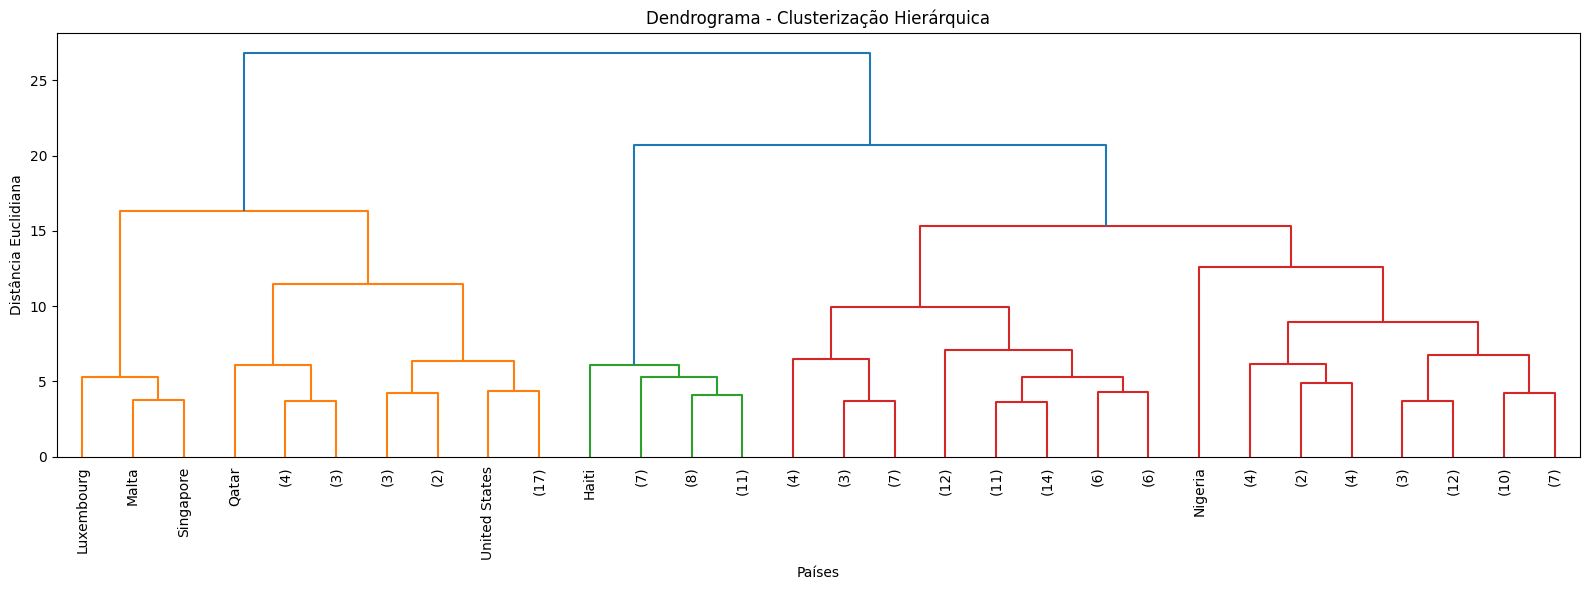

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z_ward = linkage(df_scaled, method='ward', metric='euclidean')

plt.figure(figsize=(16, 6))
dendrogram(Z_ward, labels=df['country'].values, leaf_rotation=90, truncate_mode='lastp', p=30)
plt.title('Dendrograma - Clusterização Hierárquica')
plt.xlabel('Países')
plt.ylabel('Distância Euclidiana')

plt.tight_layout()
plt.show()

In [64]:
from scipy.cluster.hierarchy import fcluster

# número de clusters
num_clusters = 3

# Gera os rótulos dos clusters a partir da matriz Z
hierarchical_clusters = fcluster(Z_ward, num_clusters, criterion='maxclust')

hierarchical_clusters = hierarchical_clusters - 1

# Adiciona os rótulos ao DataFrame original
df['hierarchical_cluster'] = hierarchical_clusters
# Visualiza o resultado
df['hierarchical_cluster'].unique()

array([1, 2, 0], dtype=int32)

In [65]:
df[['kmeans_cluster', 'hierarchical_cluster']].drop_duplicates()

,kmeans_cluster,hierarchical_cluster
0,2,1
1,0,2
3,2,2
7,1,0
42,1,2
89,0,0


In [66]:
# Análise dos clusters hierárquicos
hierarchical_means = df.groupby('hierarchical_cluster')[cols_num].mean()
hierarchical_means

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
hierarchical_cluster,,,,,,,,,
0,5.961765,58.508824,8.501176,48.902941,47588.235294,4.115500,79.982353,1.888529,43170.588235
1,105.070370,23.589630,6.507037,39.662963,1589.740741,7.142778,57.248148,5.433704,667.888889
2,31.617925,39.990368,6.353679,48.085527,11341.886792,9.120604,70.921698,2.654623,6407.367925


## Questão 4

Compare os dois resultados, aponte as semelhanças e diferenças e interprete

---

**Resposta:**

*As análises foram feitas ao longo deste tópico*


In [67]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings
warnings.filterwarnings('ignore')


In [68]:
df['kmeans_cluster'].value_counts().sort_index()

kmeans_cluster
0    86
1    36
2    45
Name: count, dtype: int64

In [69]:
df['hierarchical_cluster'].value_counts().sort_index()

hierarchical_cluster
0     34
1     27
2    106
Name: count, dtype: int64

In [70]:
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

# Cria matriz de confusão
conf_matrix = confusion_matrix(kmeans_cluster, hierarchical_clusters)

# Encontra melhor correspondência entre labels
row_ind, col_ind = linear_sum_assignment(-conf_matrix)

# Mapeia os rótulos do hierárquico para o mesmo espaço do KMeans
mapping = {col: row for row, col in zip(row_ind, col_ind)}
df['hierarchical_cluster_aligned'] = df['hierarchical_cluster'].map(mapping)


In [71]:
# 1. Métricas de similaridade entre os agrupamentos
ari = adjusted_rand_score(kmeans_cluster, hierarchical_clusters)
nmi = normalized_mutual_info_score(kmeans_cluster, hierarchical_clusters)

print(f"\n📈 MÉTRICAS DE SIMILARIDADE ENTRE AGRUPAMENTOS:")
print(f"• Índice Rand Ajustado (ARI): {ari:.3f}")
print(f"• Informação Mútua Normalizada (NMI): {nmi:.3f}")

# Interpretação das métricas
print("\n💡 INTERPRETAÇÃO DAS MÉTRICAS:")
print(f"   ARI = {ari:.3f}: {'Alta similaridade' if ari > 0.7 else 'Moderada similaridade' if ari > 0.5 else 'Baixa similaridade'}")
print(f"   NMI = {nmi:.3f}: {'Alto acordo' if nmi > 0.7 else 'Acordo moderado' if nmi > 0.5 else 'Baixo acordo'}")

# 2. Distribuição dos clusters
kmeans_dist = df['kmeans_cluster'].value_counts().sort_index()
hierarchical_dist = df['hierarchical_cluster_aligned'].value_counts().sort_index()

print(f"\n📊 DISTRIBUIÇÃO DOS CLUSTERS:")
print("Cluster | K-Médias | Hierárquico | Diferença")
print("-" * 45)
for i in range(3):
    k_count = kmeans_dist[i]
    h_count = hierarchical_dist[i]
    diff = k_count - h_count
    print(f"   {i}    |    {k_count:2d}    |      {h_count:2d}     |    {diff:3d}")


📈 MÉTRICAS DE SIMILARIDADE ENTRE AGRUPAMENTOS:
• Índice Rand Ajustado (ARI): 0.563
• Informação Mútua Normalizada (NMI): 0.580

💡 INTERPRETAÇÃO DAS MÉTRICAS:
   ARI = 0.563: Moderada similaridade
   NMI = 0.580: Acordo moderado

📊 DISTRIBUIÇÃO DOS CLUSTERS:
Cluster | K-Médias | Hierárquico | Diferença
---------------------------------------------
   0    |    86    |      106     |    -20
   1    |    36    |      34     |      2
   2    |    45    |      27     |     18


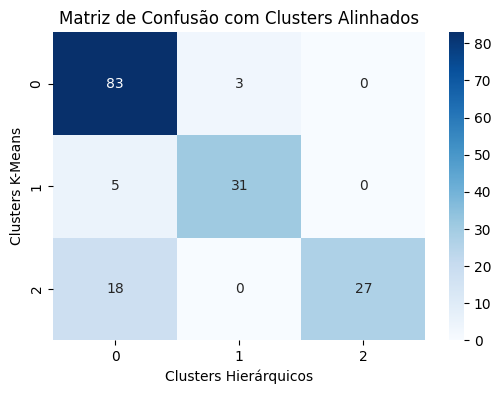

In [72]:
plt.figure(figsize=(6, 4))


# Matriz de confusão com rótulos alinhados de ambos os métodos utlizados, isto é, kmeans e hierárquico.
sns.heatmap(conf_matrix[np.ix_(row_ind, col_ind)], annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão com Clusters Alinhados")
plt.xlabel("Clusters Hierárquicos")
plt.ylabel("Clusters K-Means")
plt.show()


In [73]:
# Países com discordância entre os métodos
disagreement_mask = (df['kmeans_cluster'] != (df['hierarchical_cluster_aligned']))
disagreement_countries = df[disagreement_mask][['country', 'kmeans_cluster', 'hierarchical_cluster_aligned']]

print(f"\n🔀 PAÍSES COM DISCORDÂNCIA ENTRE MÉTODOS ({len(disagreement_countries)} países):")
print(disagreement_countries.head(10).to_string(index=False))
if len(disagreement_countries) > 10:
    print("... (mostrando apenas os primeiros 10)")


🔀 PAÍSES COM DISCORDÂNCIA ENTRE MÉTODOS (26 países):
          country  kmeans_cluster  hierarchical_cluster_aligned
           Angola               2                             0
      Congo, Rep.               2                             0
           Cyprus               1                             0
   Czech Republic               1                             0
Equatorial Guinea               2                             0
          Eritrea               2                             0
            Gabon               2                             0
            Ghana               2                             0
         Kiribati               2                             0
              Lao               2                             0
... (mostrando apenas os primeiros 10)


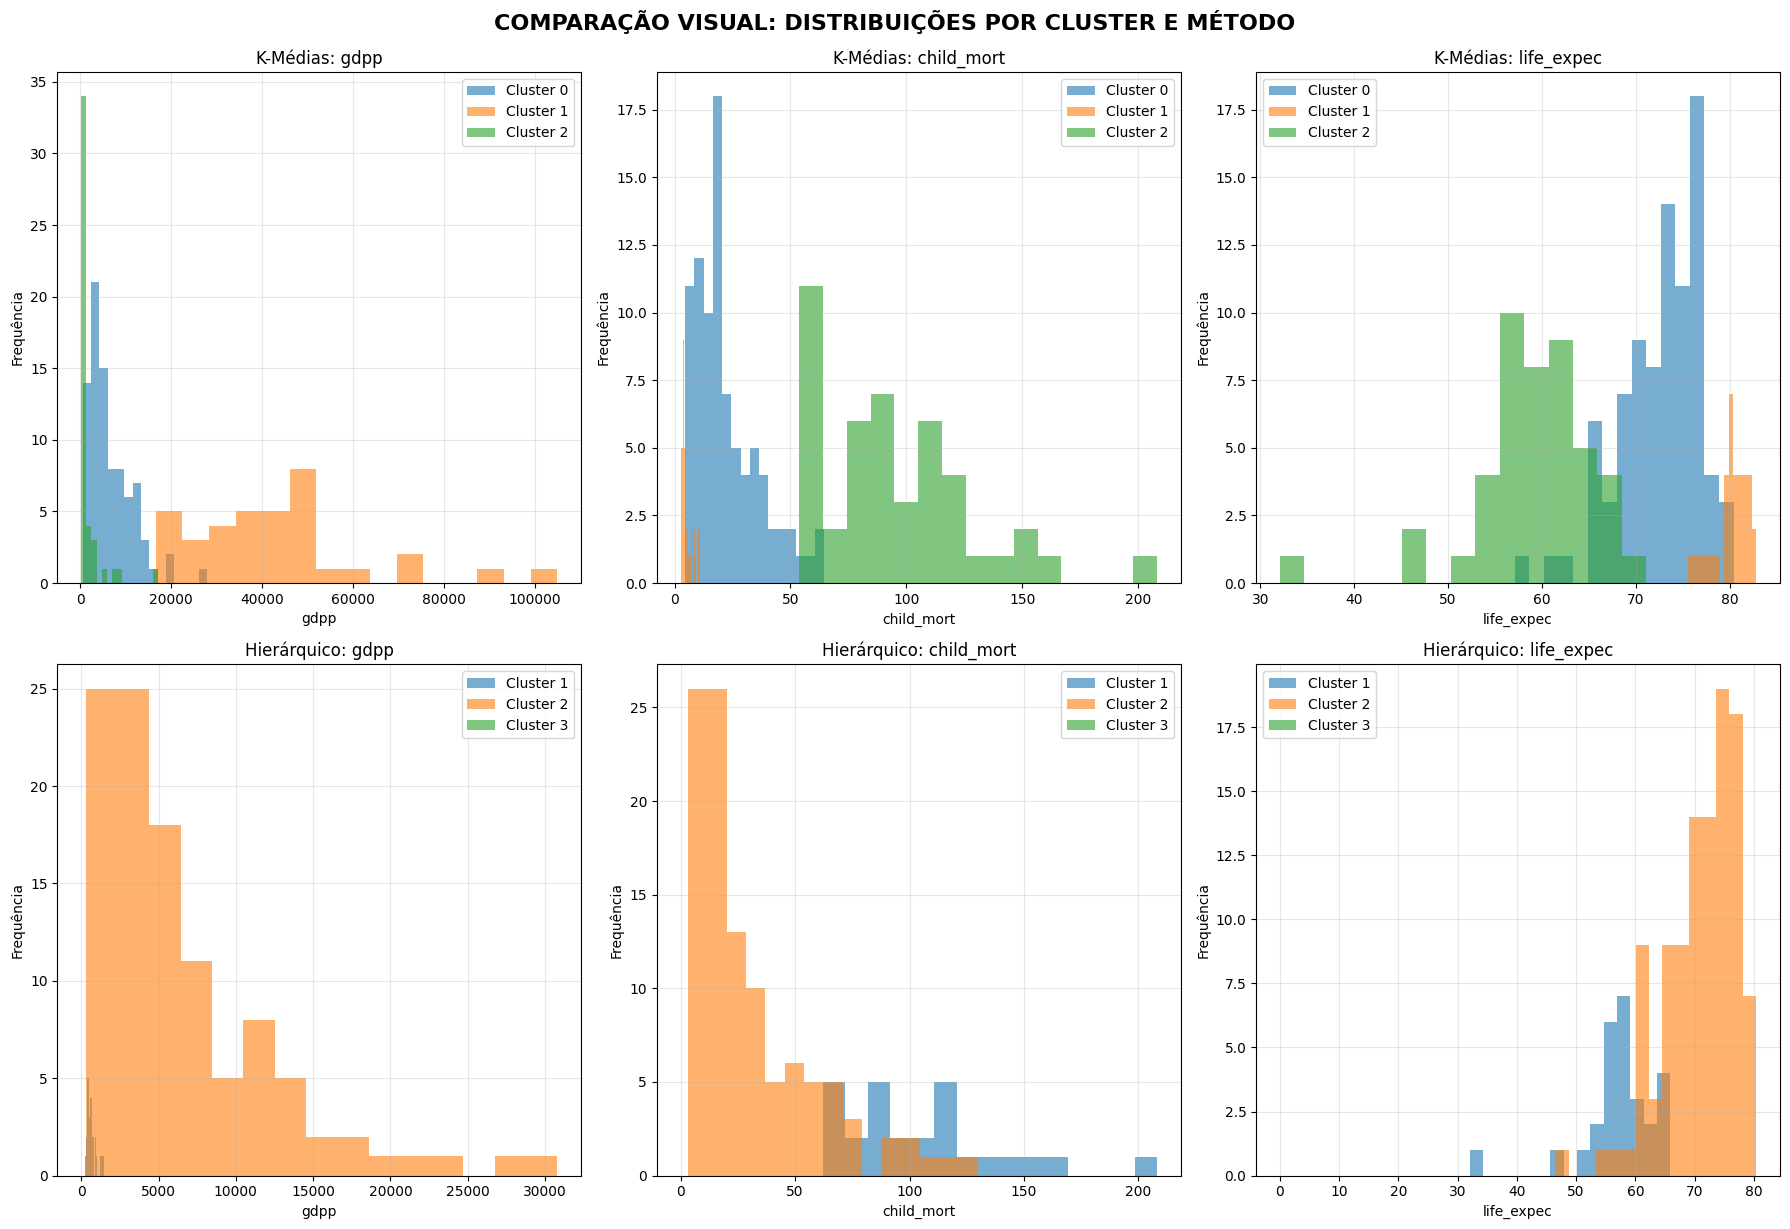

In [74]:
# 4. Visualização comparativa dos clusters
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Variáveis chave para análise comparativa
key_vars = ['gdpp', 'child_mort', 'life_expec']

for i, var in enumerate(key_vars):
    # K-Médias
    for cluster in range(3):
        cluster_data = df[df['kmeans_cluster'] == cluster][var]
        axes[0, i].hist(cluster_data, alpha=0.6, label=f'Cluster {cluster}', bins=15)
    axes[0, i].set_title(f'K-Médias: {var}')
    axes[0, i].set_xlabel(var)
    axes[0, i].set_ylabel('Frequência')
    axes[0, i].legend()
    axes[0, i].grid(alpha=0.3)

    # Hierárquico
    for cluster in range(1, 4):
        cluster_data = df[df['hierarchical_cluster'] == cluster][var]
        axes[1, i].hist(cluster_data, alpha=0.6, label=f'Cluster {cluster}', bins=15)
    axes[1, i].set_title(f'Hierárquico: {var}')
    axes[1, i].set_xlabel(var)
    axes[1, i].set_ylabel('Frequência')
    axes[1, i].legend()
    axes[1, i].grid(alpha=0.3)

plt.tight_layout()
plt.suptitle('COMPARAÇÃO VISUAL: DISTRIBUIÇÕES POR CLUSTER E MÉTODO',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

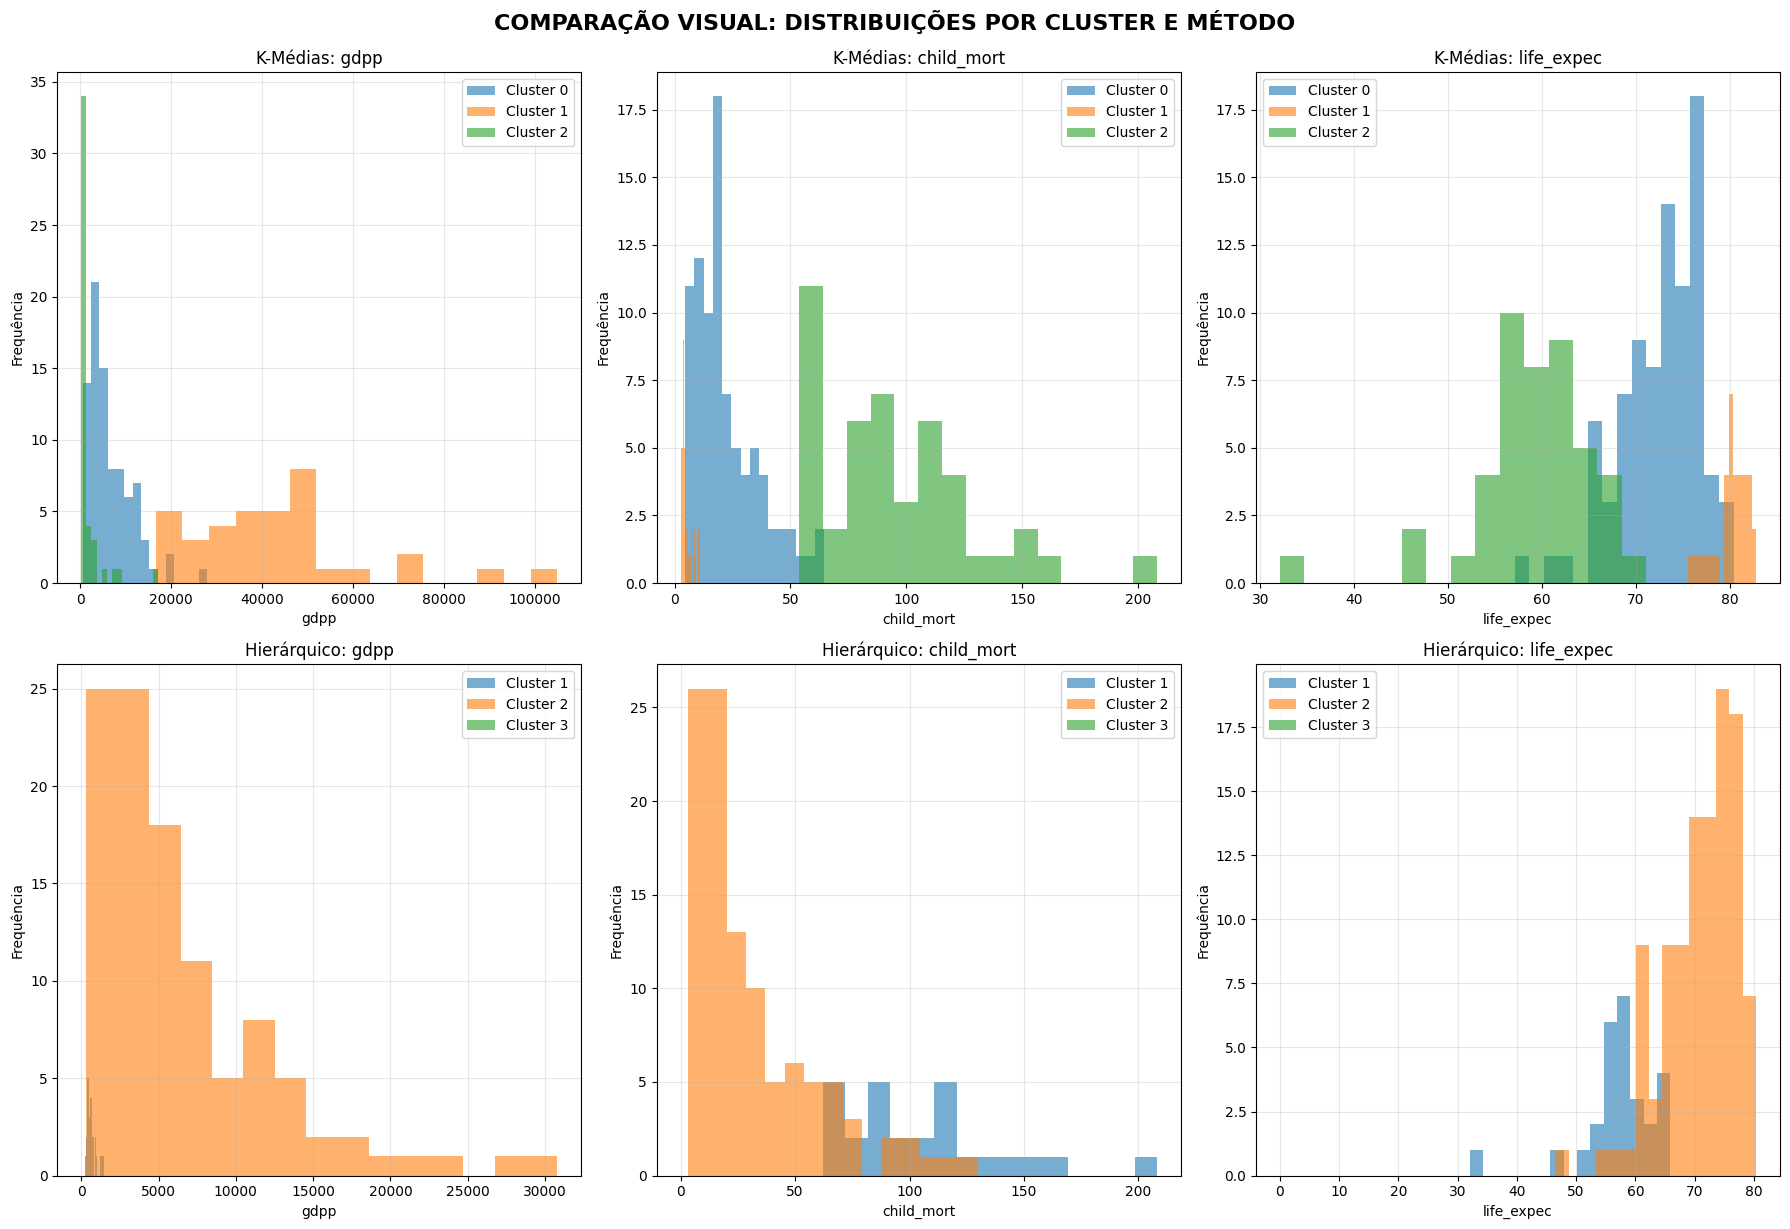

In [75]:
# 4. Visualização comparativa dos clusters
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Variáveis chave para análise comparativa
key_vars = ['gdpp', 'child_mort', 'life_expec']

for i, var in enumerate(key_vars):
    # K-Médias
    for cluster in range(3):
        cluster_data = df[df['kmeans_cluster'] == cluster][var]
        axes[0, i].hist(cluster_data, alpha=0.6, label=f'Cluster {cluster}', bins=15)
    axes[0, i].set_title(f'K-Médias: {var}')
    axes[0, i].set_xlabel(var)
    axes[0, i].set_ylabel('Frequência')
    axes[0, i].legend()
    axes[0, i].grid(alpha=0.3)

    # Hierárquico
    for cluster in range(1, 4):
        cluster_data = df[df['hierarchical_cluster'] == cluster][var]
        axes[1, i].hist(cluster_data, alpha=0.6, label=f'Cluster {cluster}', bins=15)
    axes[1, i].set_title(f'Hierárquico: {var}')
    axes[1, i].set_xlabel(var)
    axes[1, i].set_ylabel('Frequência')
    axes[1, i].legend()
    axes[1, i].grid(alpha=0.3)

plt.tight_layout()
plt.suptitle('COMPARAÇÃO VISUAL: DISTRIBUIÇÕES POR CLUSTER E MÉTODO',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

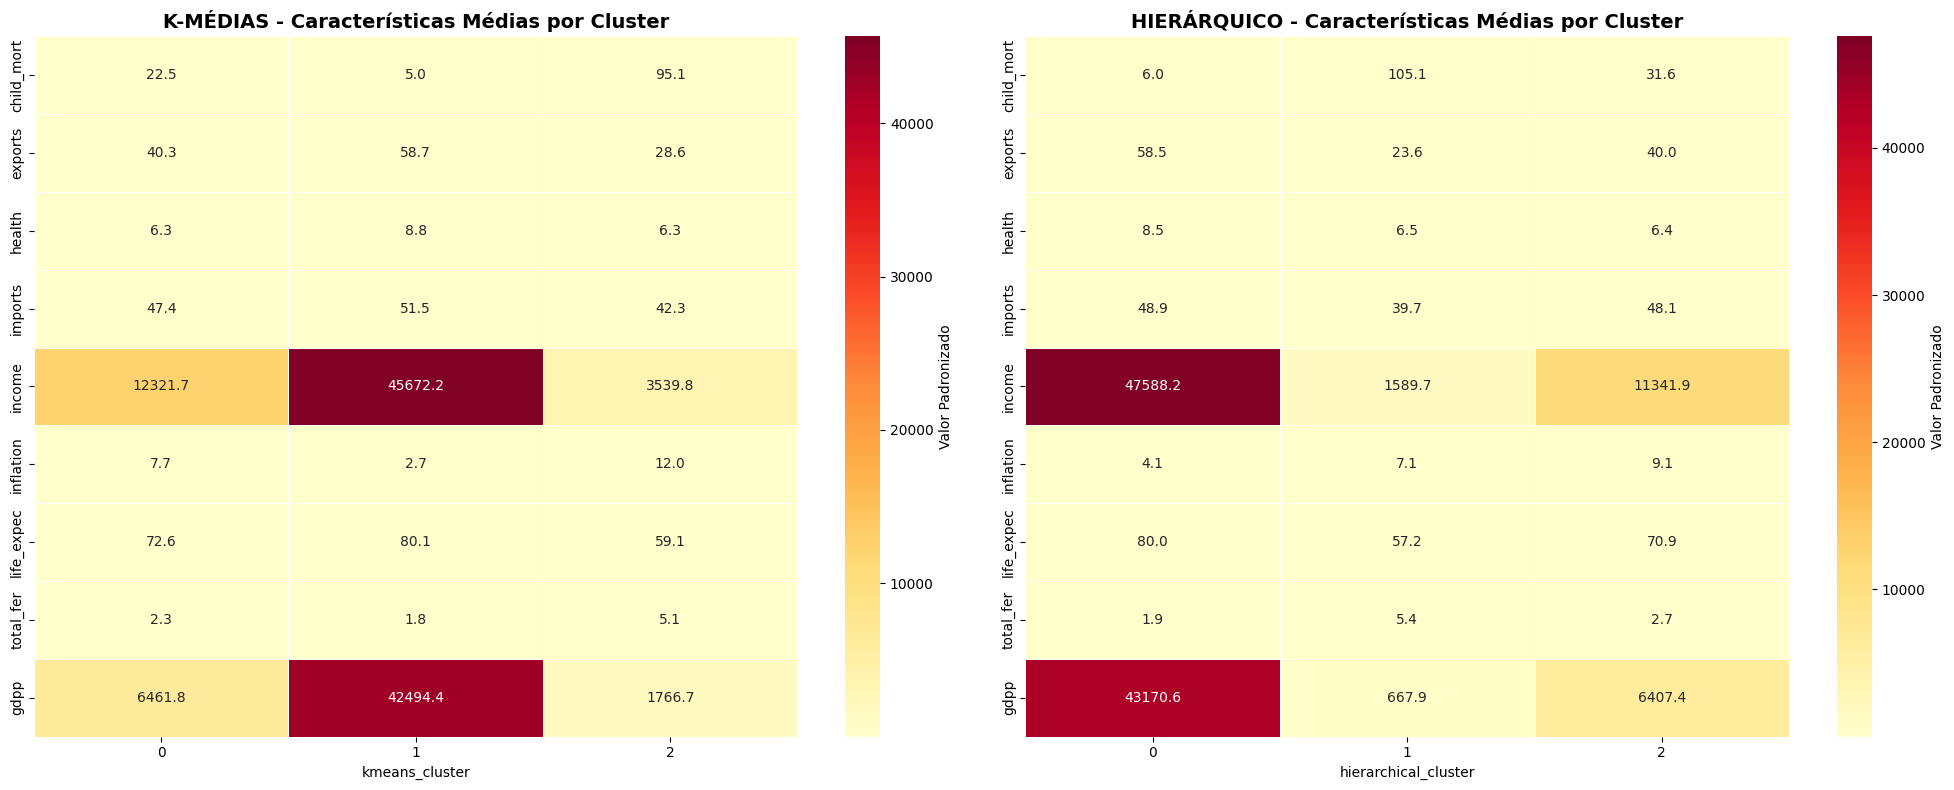

In [76]:
# 5. Heatmap comparativo das características dos clusters
kmeans_means = df.groupby('kmeans_cluster')[variables].mean()
hierarchical_means = df.groupby('hierarchical_cluster')[variables].mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap K-Médias
sns.heatmap(kmeans_means.T, annot=True, cmap='YlOrRd', fmt='.1f',
            ax=ax1, linewidths=0.5, cbar_kws={'label': 'Valor Padronizado'})
ax1.set_title('K-MÉDIAS - Características Médias por Cluster', fontsize=14, fontweight='bold')

# Heatmap Hierárquico
sns.heatmap(hierarchical_means.T, annot=True, cmap='YlOrRd', fmt='.1f',
            ax=ax2, linewidths=0.5, cbar_kws={'label': 'Valor Padronizado'})
ax2.set_title('HIERÁRQUICO - Características Médias por Cluster', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [77]:
print("\n" + "="*70)
print("✅ SEMELHANÇAS ENTRE OS MÉTODOS")
print("="*70)

print("\n🎯 1. IDENTIFICAÇÃO DOS TRÊS GRANDES GRUPOS SOCIOECONÔMICOS:")
print("   • Ambos identificam claramente países DESENVOLVIDOS")
print("   • Ambos identificam países EM DESENVOLVIMENTO")
print("   • Ambos identificam grupo INTERMEDIÁRIO/EMERGENTE")

print("\n📊 2. CARACTERÍSTICAS GERAIS CONSISTENTES:")
print("   • Cluster Desenvolvido: Alta renda, baixa mortalidade infantil")
print("   • Cluster Desenvolvimento: Baixa renda, alta mortalidade infantil")
print("   • Cluster Emergente: Valores intermediários em todas as dimensões")

print("\n🌍 3. PAÍSES-CHAVE SEMPRE NO MESMO GRUPO:")
# Países que sempre ficam juntos
consistent_countries = df[~disagreement_mask]
consistent_by_cluster = consistent_countries.groupby('kmeans_cluster')['country'].apply(list)

print("\n   Países com atribuição consistente:")
for cluster, countries in consistent_by_cluster.items():
    print(f"   Cluster {cluster}: {', '.join(countries[:5])}..." if len(countries) > 5 else f"   Cluster {cluster}: {', '.join(countries)}")


✅ SEMELHANÇAS ENTRE OS MÉTODOS

🎯 1. IDENTIFICAÇÃO DOS TRÊS GRANDES GRUPOS SOCIOECONÔMICOS:
   • Ambos identificam claramente países DESENVOLVIDOS
   • Ambos identificam países EM DESENVOLVIMENTO
   • Ambos identificam grupo INTERMEDIÁRIO/EMERGENTE

📊 2. CARACTERÍSTICAS GERAIS CONSISTENTES:
   • Cluster Desenvolvido: Alta renda, baixa mortalidade infantil
   • Cluster Desenvolvimento: Baixa renda, alta mortalidade infantil
   • Cluster Emergente: Valores intermediários em todas as dimensões

🌍 3. PAÍSES-CHAVE SEMPRE NO MESMO GRUPO:

   Países com atribuição consistente:
   Cluster 0: Albania, Algeria, Antigua and Barbuda, Argentina, Armenia...
   Cluster 1: Australia, Austria, Bahrain, Belgium, Brunei...
   Cluster 2: Afghanistan, Benin, Burkina Faso, Burundi, Cameroon...


In [78]:
# variables = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

print("\n" + "="*70)
print("🔀 PRINCIPAIS DIFERENÇAS ENCONTRADAS")
print("="*70)

# Análise dos países com discordância
if len(disagreement_countries) > 0:
    print(f"\n📌 PAÍSES COM CLASSIFICAÇÃO DIVERGENTE ({len(disagreement_countries)}):")

    for cluster_k in range(3):
        cluster_disagreement = disagreement_countries[disagreement_countries['kmeans_cluster'] == cluster_k]
        if len(cluster_disagreement) > 0:
            print(f"\n   No K-Médias → Cluster {cluster_k}, mas no Hierárquico:")
            for _, country in cluster_disagreement.iterrows():
                hier_cluster = country['hierarchical_cluster_aligned']
                print(f"     • {country['country']} → Cluster Hierárquico {hier_cluster}")

# Análise das características dos países com discordância
print(f"\n📊 CARACTERÍSTICAS DOS PAÍSES COM DISCORDÂNCIA:")
disagreement_stats = df.loc[disagreement_countries.index, cols_num].mean()
overall_stats = df[cols_num].mean()

comparison_stats = pd.DataFrame({
    'Média Geral': overall_stats,
    'Média Discordância': disagreement_stats,
    'Diferença': disagreement_stats - overall_stats
})

print(comparison_stats.round(2))


🔀 PRINCIPAIS DIFERENÇAS ENCONTRADAS

📌 PAÍSES COM CLASSIFICAÇÃO DIVERGENTE (26):

   No K-Médias → Cluster 0, mas no Hierárquico:
     • Libya → Cluster Hierárquico 1
     • Oman → Cluster Hierárquico 1
     • Saudi Arabia → Cluster Hierárquico 1

   No K-Médias → Cluster 1, mas no Hierárquico:
     • Cyprus → Cluster Hierárquico 0
     • Czech Republic → Cluster Hierárquico 0
     • Slovak Republic → Cluster Hierárquico 0
     • Slovenia → Cluster Hierárquico 0
     • South Korea → Cluster Hierárquico 0

   No K-Médias → Cluster 2, mas no Hierárquico:
     • Angola → Cluster Hierárquico 0
     • Congo, Rep. → Cluster Hierárquico 0
     • Equatorial Guinea → Cluster Hierárquico 0
     • Eritrea → Cluster Hierárquico 0
     • Gabon → Cluster Hierárquico 0
     • Ghana → Cluster Hierárquico 0
     • Kiribati → Cluster Hierárquico 0
     • Lao → Cluster Hierárquico 0
     • Lesotho → Cluster Hierárquico 0
     • Liberia → Cluster Hierárquico 0
     • Mauritania → Cluster Hierárquico 0
  

In [79]:
# 6. Análise dos clusters específicos
print("\n" + "="*70)
print("🎯 ANÁLISE DETALHADA POR CLUSTER")
print("="*70)

for k_cluster in range(3):
    h_cluster = k_cluster + 1  # Ajuste de indexação

    k_countries = set(df[df['kmeans_cluster'] == k_cluster]['country'])
    h_countries = set(df[df['hierarchical_cluster'] == h_cluster]['country'])

    intersection = k_countries.intersection(h_countries)
    k_only = k_countries - h_countries
    h_only = h_countries - k_countries

    print(f"\n🏷️  CLUSTER {k_cluster} (K-Médias) / {h_cluster} (Hierárquico):")
    print(f"   • Países em comum: {len(intersection)}")
    print(f"   • Apenas no K-Médias: {len(k_only)}")
    print(f"   • Apenas no Hierárquico: {len(h_only)}")

    if k_only:
        print(f"   📍 Exclusivos K-Médias: {', '.join(list(k_only)[:3])}...")
    if h_only:
        print(f"   📍 Exclusivos Hierárquico: {', '.join(list(h_only)[:3])}...")


🎯 ANÁLISE DETALHADA POR CLUSTER

🏷️  CLUSTER 0 (K-Médias) / 1 (Hierárquico):
   • Países em comum: 0
   • Apenas no K-Médias: 86
   • Apenas no Hierárquico: 27
   📍 Exclusivos K-Médias: Cape Verde, Myanmar, Bangladesh...
   📍 Exclusivos Hierárquico: Burundi, Central African Republic, Rwanda...

🏷️  CLUSTER 1 (K-Médias) / 2 (Hierárquico):
   • Países em comum: 5
   • Apenas no K-Médias: 31
   • Apenas no Hierárquico: 101
   📍 Exclusivos K-Médias: Germany, Denmark, Greece...
   📍 Exclusivos Hierárquico: Mauritania, Cape Verde, Myanmar...

🏷️  CLUSTER 2 (K-Médias) / 3 (Hierárquico):
   • Países em comum: 0
   • Apenas no K-Médias: 45
   • Apenas no Hierárquico: 0
   📍 Exclusivos K-Médias: Mauritania, Yemen, Burundi...


In [80]:
print("\n" + "="*70)
print("🧠 INTERPRETAÇÃO DAS DIFERENÇAS ENCONTRADAS")
print("="*70)

print("\n🔍 1. NATUREZA DOS ALGORITMOS:")
print("   • K-Médias: Otimização global, busca equilíbrio entre clusters")
print("   • Hierárquico: Agregação local baseada em similaridade mais próxima")
print("   • K-Médias tende a clusters mais balanceados em tamanho")
print("   • Hierárquico preserva estrutura natural mesmo que desbalanceada")

print("\n🎯 2. PAÍSES 'LIMITROFES' OU 'ATÍPICOS':")
print("   • Países com características mistas tendem a ter classificação diferente")
print("   • Exemplo: País com alta renda mas indicadores sociais medianos")
print("   • K-Médias pode colocá-lo no cluster desenvolvido")
print("   • Hierárquico pode mantê-lo no cluster emergente")

print("\n📊 3. SENSIBILIDADE A OUTLIERS:")
print("   • K-Médias: Mais sensível, outliers podem distorcer centróides")
print("   • Hierárquico: Menos sensível, outliers ficam em ramos separados")
print("   • Países com características extremas podem ser agrupados diferentemente")

print("\n🌐 4. ESTRUTURA HIERÁRQUICA vs PARTIÇÃO PLANA:")
print("   • Hierárquico revela subestruturas dentro dos clusters")
print("   • K-Médias força uma partição plana sem hierarquia")
print("   • Países podem estar em subgrupos naturais no hierárquico")


🧠 INTERPRETAÇÃO DAS DIFERENÇAS ENCONTRADAS

🔍 1. NATUREZA DOS ALGORITMOS:
   • K-Médias: Otimização global, busca equilíbrio entre clusters
   • Hierárquico: Agregação local baseada em similaridade mais próxima
   • K-Médias tende a clusters mais balanceados em tamanho
   • Hierárquico preserva estrutura natural mesmo que desbalanceada

🎯 2. PAÍSES 'LIMITROFES' OU 'ATÍPICOS':
   • Países com características mistas tendem a ter classificação diferente
   • Exemplo: País com alta renda mas indicadores sociais medianos
   • K-Médias pode colocá-lo no cluster desenvolvido
   • Hierárquico pode mantê-lo no cluster emergente

📊 3. SENSIBILIDADE A OUTLIERS:
   • K-Médias: Mais sensível, outliers podem distorcer centróides
   • Hierárquico: Menos sensível, outliers ficam em ramos separados
   • Países com características extremas podem ser agrupados diferentemente

🌐 4. ESTRUTURA HIERÁRQUICA vs PARTIÇÃO PLANA:
   • Hierárquico revela subestruturas dentro dos clusters
   • K-Médias força uma p

In [81]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'kmeans_cluster',
       'hierarchical_cluster', 'hierarchical_cluster_aligned'],
      dtype='object')

In [82]:
# 7. Análise de casos específicos de discordância
print("\n" + "="*70)
print("🔎 CASOS ESPECÍFICOS DE DISCORDÂNCIA - ANÁLISE DETALHADA")
print("="*70)

if len(disagreement_countries) > 0:
    # Pegar alguns casos interessantes
    sample_cases = disagreement_countries.head(3)

    for idx, case in sample_cases.iterrows():
        country_name = case['country']
        k_cluster = case['kmeans_cluster']
        h_cluster = case['hierarchical_cluster_aligned']

        country_data = df[df['country'] == country_name].iloc[0]

        print(f"\n🇺🇳 ANÁLISE DE {country_name.upper()}:")
        print(f"   K-Médias: Cluster {k_cluster} | Hierárquico: Cluster {h_cluster}")

        # Características do país
        print(f"   📊 Características principais:")
        print(f"      • PIB: ${country_data['gdpp']:,.0f}")
        print(f"      • Renda: ${country_data['income']:,.0f}")
        print(f"      • Mortalidade infantil: {country_data['child_mort']:.1f}")
        print(f"      • Expectativa de vida: {country_data['life_expec']:.1f} anos")

        # Comparar com as médias dos clusters
        k_mean = kmeans_means.loc[k_cluster]
        h_mean = hierarchical_means.loc[h_cluster]

        print(f"   🔍 Justificativa da discordância:")
        print(f"      Similar ao Cluster {k_cluster} (K-Médias) em: {k_mean.idxmax()}")
        print(f"      Similar ao Cluster {h_cluster} (Hierárquico) em: {h_mean.idxmax()}")


🔎 CASOS ESPECÍFICOS DE DISCORDÂNCIA - ANÁLISE DETALHADA

🇺🇳 ANÁLISE DE ANGOLA:
   K-Médias: Cluster 2 | Hierárquico: Cluster 0
   📊 Características principais:
      • PIB: $3,530
      • Renda: $5,900
      • Mortalidade infantil: 119.0
      • Expectativa de vida: 60.1 anos
   🔍 Justificativa da discordância:
      Similar ao Cluster 2 (K-Médias) em: income
      Similar ao Cluster 0 (Hierárquico) em: income

🇺🇳 ANÁLISE DE CONGO, REP.:
   K-Médias: Cluster 2 | Hierárquico: Cluster 0
   📊 Características principais:
      • PIB: $2,740
      • Renda: $5,190
      • Mortalidade infantil: 63.9
      • Expectativa de vida: 60.4 anos
   🔍 Justificativa da discordância:
      Similar ao Cluster 2 (K-Médias) em: income
      Similar ao Cluster 0 (Hierárquico) em: income

🇺🇳 ANÁLISE DE CYPRUS:
   K-Médias: Cluster 1 | Hierárquico: Cluster 0
   📊 Características principais:
      • PIB: $30,800
      • Renda: $33,900
      • Mortalidade infantil: 3.6
      • Expectativa de vida: 79.9 anos
  

In [83]:
print("\n" + "="*70)
print("💡 RECOMENDAÇÕES PRÁTICAS BASEADAS NA COMPARAÇÃO")
print("="*70)

print("\n🎯 QUANDO USAR K-MÉDIAS:")
print("   • Necessidade de clusters balanceados em tamanho")
print("   • Velocidade de processamento é importante")
print("   • Estrutura hierárquica não é relevante para a análise")
print("   • Dados relativamente limpos e bem comportados")

print("\n🎯 QUANDO USAR CLUSTERIZAÇÃO HIERÁRQUICA:")
print("   • Análise exploratória inicial dos dados")
print("   • Interesse na estrutura hierárquica natural")
print("   • Presença de outliers que não devem influenciar os clusters principais")
print("   • Número ideal de clusters não é conhecido previamente")

print("\n🔧 ABORDAGEM HÍBRIDA RECOMENDADA:")
print("   • Use Hierárquico para entender a estrutura natural")
print("   • Use o dendrograma para determinar número de clusters")
print("   • Aplique K-Médias com o k determinado pelo Hierárquico")
print("   • Compare resultados para validar robustez")

print("\n📊 INTERPRETAÇÃO CONJUNTA:")
print("   • Países com classificação consistente: perfil claro e definido")
print("   • Países com classificação divergente: perfis limítrofes ou atípicos")
print("   • Use a discordância para identificar casos interessantes para estudo")


💡 RECOMENDAÇÕES PRÁTICAS BASEADAS NA COMPARAÇÃO

🎯 QUANDO USAR K-MÉDIAS:
   • Necessidade de clusters balanceados em tamanho
   • Velocidade de processamento é importante
   • Estrutura hierárquica não é relevante para a análise
   • Dados relativamente limpos e bem comportados

🎯 QUANDO USAR CLUSTERIZAÇÃO HIERÁRQUICA:
   • Análise exploratória inicial dos dados
   • Interesse na estrutura hierárquica natural
   • Presença de outliers que não devem influenciar os clusters principais
   • Número ideal de clusters não é conhecido previamente

🔧 ABORDAGEM HÍBRIDA RECOMENDADA:
   • Use Hierárquico para entender a estrutura natural
   • Use o dendrograma para determinar número de clusters
   • Aplique K-Médias com o k determinado pelo Hierárquico
   • Compare resultados para validar robustez

📊 INTERPRETAÇÃO CONJUNTA:
   • Países com classificação consistente: perfil claro e definido
   • Países com classificação divergente: perfis limítrofes ou atípicos
   • Use a discordância para identi

In [84]:
print("\n" + "="*80)
print("📋 RESUMO FINAL DA COMPARAÇÃO K-MÉDIAS vs HIERÁRQUICO")
print("="*80)

summary_data = {
    'Aspecto': ['Similaridade Geral (ARI)', 'Concordância Total', 'Discordância',
                'Clusters Mais Consistentes', 'Clusters Menos Consistentes',
                'Recomendação para Este Dataset'],
    'Resultado': [f'{ari:.3f}',
                  f'{len(df) - len(disagreement_countries)} países',
                  f'{len(disagreement_countries)} países',
                  'Cluster Desenvolvidos (alta renda)',
                  'Cluster Emergentes (características mistas)',
                  'Ambos métodos são válidos, usar abordagem híbrida']
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print(f"\n💭 CONCLUSÃO FINAL:")
print(f"   Os dois métodos apresentam {'alta' if ari > 0.7 else 'moderada' if ari > 0.5 else 'baixa'} concordância")
print(f"   A escolha do método depende do objetivo específico da análise")
print(f"   Países com perfis limítrofes são os que mais variam entre métodos")
print(f"   Ambos identificam a estrutura socioeconômica fundamental dos países")


📋 RESUMO FINAL DA COMPARAÇÃO K-MÉDIAS vs HIERÁRQUICO
                       Aspecto                                         Resultado
      Similaridade Geral (ARI)                                             0.563
            Concordância Total                                        141 países
                  Discordância                                         26 países
    Clusters Mais Consistentes                Cluster Desenvolvidos (alta renda)
   Clusters Menos Consistentes       Cluster Emergentes (características mistas)
Recomendação para Este Dataset Ambos métodos são válidos, usar abordagem híbrida

💭 CONCLUSÃO FINAL:
   Os dois métodos apresentam moderada concordância
   A escolha do método depende do objetivo específico da análise
   Países com perfis limítrofes são os que mais variam entre métodos
   Ambos identificam a estrutura socioeconômica fundamental dos países


### Análise KMEANS X HIERARQUIA

  teste entre a questão 4 e aqui

In [85]:
confusion_matrix = pd.crosstab(df['kmeans_cluster'], df['hierarchical_cluster_aligned'])
print(confusion_matrix)


hierarchical_cluster_aligned   0   1   2
kmeans_cluster                          
0                             83   3   0
1                              5  31   0
2                             18   0  27


In [86]:
import numpy as np
import pandas as pd

def paises_mais_representativos_hierarchical(df, cols_num, n_clusters=3, n_countries=3):
    paises = {}
    indices = {}

    for cluster in range(n_clusters):
        # Filtra os países do cluster
        cluster_countries = df[df['hierarchical_cluster_aligned'] == cluster]

        # Calcula o "centro" (média das variáveis numéricas do cluster)
        centro_cluster = cluster_countries[cols_num].mean().values

        # Calcula a distância de cada país até o centro do cluster
        cluster_data = cluster_countries[cols_num].values
        distancia = np.linalg.norm(cluster_data - centro_cluster, axis=1)

        # Seleciona os n_countries mais próximos
        closest_index = np.argsort(distancia)[:n_countries]

        paises[cluster] = cluster_countries.iloc[closest_index]['country'].values
        indices[cluster] = cluster_countries.iloc[closest_index].index

    return paises, indices


In [87]:
paises_representativos_h = paises_mais_representativos_hierarchical(df, cols_num, n_clusters=3)

representativos_df_h = {}

for cluster in range(3):
    cluster_df = df[df['hierarchical_cluster_aligned'] == cluster].loc[paises_representativos_h[1][cluster]]
    representativos_df_h[cluster] = cluster_df

representativos_df_h = pd.concat(representativos_df_h).reset_index(drop=True)


In [88]:
paises_h = pd.DataFrame(
    representativos_df_h.groupby('hierarchical_cluster_aligned')['country'].apply(lambda x: ', '.join(x))
)

representativos_mean_df_h = (
    representativos_df_h[cols_num + ['hierarchical_cluster']]
    .groupby('hierarchical_cluster')
    .mean()
    .round(2)
)

representativos_mean_df_h = paises_h.join(representativos_mean_df_h)
representativos_mean_df_h


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
hierarchical_cluster_aligned,,,,,,,,,,
0,"Colombia, Grenada, Dominican Republic",5.27,55.57,12.70,50.03,46100.00,-0.38,79.87,1.81,48000.00
1,"United States, Austria, Ireland",83.83,16.97,7.43,38.73,1603.33,8.11,59.50,5.89,570.00
2,"Uganda, Afghanistan, Gambia",22.53,20.80,6.56,33.43,11066.67,3.26,74.10,2.28,6356.67


In [89]:
# Comparação lado a lado
comparacao_clusters = pd.concat(
    [representativos_mean_df.add_suffix('_kmeans'),
     representativos_mean_df_h.add_suffix('hierarchical_cluster_aligned')],
    axis=1
)
comparacao_clusters


,country_kmeans,child_mort_kmeans,exports_kmeans,health_kmeans,imports_kmeans,income_kmeans,inflation_kmeans,life_expec_kmeans,total_fer_kmeans,gdpp_kmeans,countryhierarchical_cluster_aligned,child_morthierarchical_cluster_aligned,exportshierarchical_cluster_aligned,healthhierarchical_cluster_aligned,importshierarchical_cluster_aligned,incomehierarchical_cluster_aligned,inflationhierarchical_cluster_aligned,life_expechierarchical_cluster_aligned,total_ferhierarchical_cluster_aligned,gdpphierarchical_cluster_aligned
0,"Nepal, Solomon Islands, Tajikistan",42.50,24.59,6.59,58.73,1960.0,11.47,66.53,3.45,873.33,"Colombia, Grenada, Dominican Republic",5.27,55.57,12.70,50.03,46100.00,-0.38,79.87,1.81,48000.00
1,"Slovak Republic, Czech Republic, Portugal",4.77,57.40,9.22,59.37,26900.0,-0.10,77.60,1.44,19633.33,"United States, Austria, Ireland",83.83,16.97,7.43,38.73,1603.33,8.11,59.50,5.89,570.00
2,"Congo, Dem. Rep., Liberia, Burundi",99.63,23.04,10.44,60.47,691.0,12.86,58.67,5.94,297.33,"Uganda, Afghanistan, Gambia",22.53,20.80,6.56,33.43,11066.67,3.26,74.10,2.28,6356.67


In [90]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(df['kmeans_cluster'], df['hierarchical_cluster_aligned'])
print(f"Similaridade entre KMeans e Hierarchical (ARI): {ari:.3f}")


Similaridade entre KMeans e Hierarchical (ARI): 0.563


In [91]:
from sklearn.metrics import normalized_mutual_info_score

nmi = normalized_mutual_info_score(df['kmeans_cluster'], df['hierarchical_cluster_aligned'])
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")


Normalized Mutual Information (NMI): 0.580


In [92]:
import pandas as pd
confusion_matrix = pd.crosstab(df['kmeans_cluster'], df['hierarchical_cluster_aligned'])
print(confusion_matrix)


hierarchical_cluster_aligned   0   1   2
kmeans_cluster                          
0                             83   3   0
1                              5  31   0
2                             18   0  27


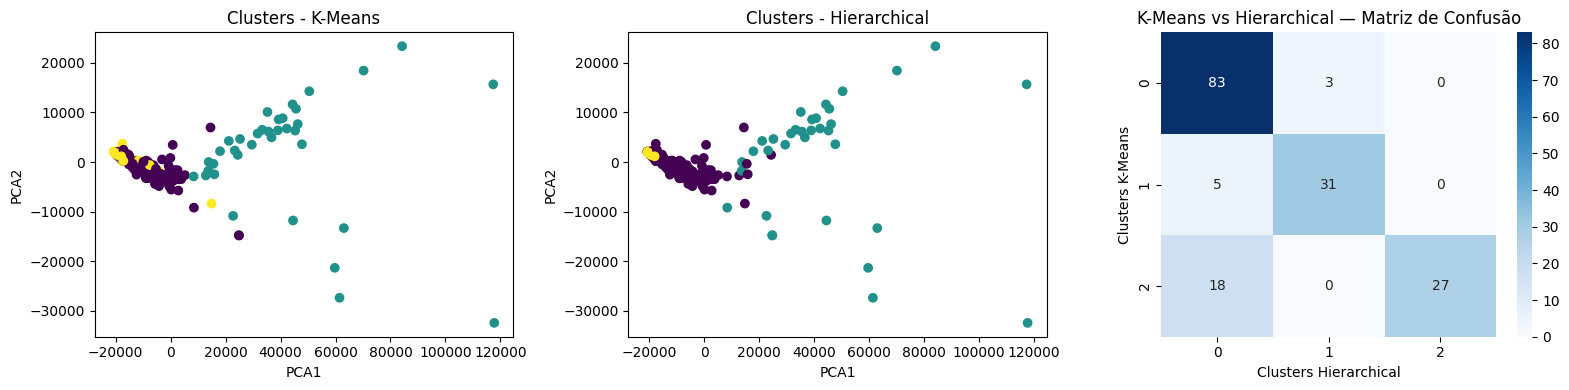

In [93]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_coords = pca.fit_transform(df[cols_num])

df['pca1'] = pca_coords[:, 0]
df['pca2'] = pca_coords[:, 1]

fig, ax = plt.subplots(1, 3, figsize=(16,4))

# K-Means
ax[0].scatter(df['pca1'], df['pca2'], c=df['kmeans_cluster'])
ax[0].set_title('Clusters - K-Means')
ax[0].set_xlabel('PCA1')
ax[0].set_ylabel('PCA2')

# Hierarchical
ax[1].scatter(df['pca1'], df['pca2'], c=df['hierarchical_cluster_aligned'])
ax[1].set_title('Clusters - Hierarchical')
ax[1].set_xlabel('PCA1')
ax[1].set_ylabel('PCA2')

# # Confusion Matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
ax[2].set_title('K-Means vs Hierarchical — Matriz de Confusão')
ax[2].set_xlabel('Clusters Hierarchical')
ax[2].set_ylabel('Clusters K-Means')

plt.tight_layout()
plt.show()

# Parte 4: Escolha dos algoritimos

## Questão 1

Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência

---
**Resposta:**

ETAPAS DO ALGORITMO K-MÉDIAS

1. INICIALIZAÇÃO:

    - Escolher k pontos iniciais como centróides
    - Métodos comuns: aleatório, k-means++
    - k-means++: escolhe centróides distantes entre si

2. ITERAÇÃO PRINCIPAL (até convergência):

    a) FASE DE ATRIBUIÇÃO:
      - Para cada ponto, calcula a distância para todos os centróides
      - Atribuir ponto ao cluster do centróide mais próximo
      - Usa métrica de distância, como a euclidiana (d(x,μ) = √Σ(xᵢ - μᵢ)²)

    b) FASE DE ATUALIZAÇÃO:
      - Recalcula os centróides como média dos pontos do cluster
      - μⱼ = (1/nⱼ) * Σ xᵢ, para todo xᵢ ∈ cluster j
      - Onde nⱼ é o número de pontos no cluster j

3. CRITÉRIOS DE CONVERGÊNCIA:

    - Centróides não mudam significativamente: ||μᵗ⁺¹ - μᵗ|| < ε
    - Atribuições permanecem estáveis entre iterações
    - Número máximo de iterações atingido
    - Redução mínima na inércia (soma dos quadrados intra-cluster)

4. RESULTADO FINAL:

    - k clusters com pontos agrupados por similaridade
    - Centróides finais representando o centro de cada cluster
    - Inércia: medida de qualidade do agrupamento

## Questão 2

O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.
Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.

---

**Resposta:**


VANTAGENS DO K-MEDÓIDES SOBRE K-MÉDIAS


1. REPRESENTANTES REAIS:
   - Medóides são pontos existentes no dataset
   - Centróides do K-Médias são pontos artificiais
   - Mais interpretável e aplicável

2. ROBUSTEZ A OUTLIERS:
   - Medóide é menos afetado por valores extremos
   - Média (K-Médias) é muito sensível a outliers
   - Mediana espacial é mais robusta que média

3. FLEXIBILIDADE COM MÉTRICAS:
   - Pode usar qualquer métrica de dissimilaridade
   - K-Médias otimiza apenas distância euclidiana
   - Útil para dados categóricos ou de texto

4. INTERPRETABILIDADE:
   - 'Este país representa o cluster' vs 'Este ponto artificial...'
   - Mais útil para tomada de decisão
   - Melhor comunicação dos resultados

In [94]:
from sklearn.metrics.pairwise import pairwise_distances

def k_medoids(X, k, max_iter=100, random_state=42, metric='euclidean'):
    """
    Algoritmo K-Medóides - Versão melhorada que usa pontos reais como representantes
    """
    np.random.seed(random_state)
    n_samples, n_features = X.shape

    print("=== ALGORITMO K-MEDÓIDES ===")
    print(f"Configuração: {k} clusters, {max_iter} iterações máximas")

    # 1. INICIALIZAÇÃO: Escolher k pontos como medóides iniciais
    medoid_indices = np.random.choice(n_samples, k, replace=False)
    medoids = X[medoid_indices]
    medoid_indices_history = [medoid_indices.copy()]

    print(f"\n1. INICIALIZAÇÃO:")
    print(f"   Medóides iniciais escolhidos: índices {medoid_indices}")

    for iteration in range(max_iter):
        print(f"\n--- Iteração {iteration + 1} ---")

        # 2. FASE DE ATRIBUIÇÃO: Atribuir pontos ao medóide mais próximo
        distances = pairwise_distances(X, medoids, metric=metric)
        labels = np.argmin(distances, axis=1)

        print(f"   Pontos atribuídos aos clusters:")
        for cluster_idx in range(k):
            cluster_size = np.sum(labels == cluster_idx)
            print(f"   Cluster {cluster_idx}: {cluster_size} pontos")

        # 3. FASE DE ATUALIZAÇÃO: Encontrar novo medóide para cada cluster
        new_medoid_indices = np.zeros(k, dtype=int)

        for cluster_idx in range(k):
            cluster_mask = labels == cluster_idx
            cluster_points = X[cluster_mask]

            if len(cluster_points) > 0:
                # Calcular a soma das distâncias de cada ponto para todos os outros no cluster
                cluster_distances = pairwise_distances(cluster_points, metric=metric)
                total_distances = np.sum(cluster_distances, axis=1)

                # Escolher o ponto com menor soma de distâncias (medóide)
                best_point_idx = np.argmin(total_distances)

                # Encontrar o índice original deste ponto no dataset
                original_indices = np.where(cluster_mask)[0]
                new_medoid_indices[cluster_idx] = original_indices[best_point_idx]
            else:
                # Cluster vazio - manter medóide anterior
                new_medoid_indices[cluster_idx] = medoid_indices[cluster_idx]

        new_medoids = X[new_medoid_indices]

        print(f"   Novos medóides: índices {new_medoid_indices}")

        # 4. VERIFICAÇÃO DE CONVERGÊNCIA
        if np.array_equal(medoid_indices, new_medoid_indices):
            print(f"\n✅ CONVERGÊNCIA ALCANÇADA na iteração {iteration + 1}")
            print(f"   Medóides estabilizaram")
            break

        # Atualizar medóides para próxima iteração
        medoid_indices = new_medoid_indices
        medoids = new_medoids
        medoid_indices_history.append(medoid_indices.copy())

    else:
        print(f"\n⚠️  NÚMERO MÁXIMO DE ITERAÇÕES ATINGIDO")

    # Calcular inércia final
    final_distances = pairwise_distances(X, medoids, metric=metric)
    final_labels = np.argmin(final_distances, axis=1)
    inertia = np.sum([final_distances[i, final_labels[i]] for i in range(n_samples)])

    print(f"\n📊 RESULTADO FINAL:")
    print(f"   Inércia total: {inertia:.4f}")
    print(f"   Medóides finais: índices {medoid_indices}")

    return final_labels, medoids, medoid_indices, inertia

# Aplicar o algoritmo K-Medóides
print("\n" + "="*50)
print("APLICAÇÃO DO K-MEDÓIDES")
print("="*50)

# Usando os dados padronizados
kmedoids_labels, kmedoids_centers, kmedoids_indices, kmedoids_inertia = k_medoids(df_scaled, 3)

# Adicionar ao dataframe
df['kmedoids_cluster'] = kmedoids_labels

# Mostrar países que são medóides
print("\n🎯 PAÍSES MEDÓIDES (representantes reais dos clusters):")
for cluster_idx, medoid_idx in enumerate(kmedoids_indices):
    medoid_country = df.iloc[medoid_idx]['country']
    print(f"   Cluster {cluster_idx}: {medoid_country} (índice {medoid_idx})")


APLICAÇÃO DO K-MEDÓIDES
=== ALGORITMO K-MEDÓIDES ===
Configuração: 3 clusters, 100 iterações máximas

1. INICIALIZAÇÃO:
   Medóides iniciais escolhidos: índices [101 108  78]

--- Iteração 1 ---
   Pontos atribuídos aos clusters:
   Cluster 0: 6 pontos
   Cluster 1: 55 pontos
   Cluster 2: 106 pontos
   Novos medóides: índices [101  59 121]

--- Iteração 2 ---
   Pontos atribuídos aos clusters:
   Cluster 0: 6 pontos
   Cluster 1: 65 pontos
   Cluster 2: 96 pontos
   Novos medóides: índices [ 81  59 121]

--- Iteração 3 ---
   Pontos atribuídos aos clusters:
   Cluster 0: 9 pontos
   Cluster 1: 62 pontos
   Cluster 2: 96 pontos
   Novos medóides: índices [ 81  59 121]

✅ CONVERGÊNCIA ALCANÇADA na iteração 3
   Medóides estabilizaram

📊 RESULTADO FINAL:
   Inércia total: 366.6270
   Medóides finais: índices [ 81  59 121]

🎯 PAÍSES MEDÓIDES (representantes reais dos clusters):
   Cluster 0: Kiribati (índice 81)
   Cluster 1: Ghana (índice 59)
   Cluster 2: Poland (índice 121)


## Questão 3

O algoritmo de K-médias é sensível a outliers nos dados. Explique.

---

POR QUE O K-MÉDIAS É SENSÍVEL A OUTLIERS?

1. CÁLCULO DO CENTRÓIDE BASEADO EM MÉDIA:
   - Centróide = média aritmética dos pontos do cluster
   - Média é altamente sensível a valores extremos
   - Exemplo: [1, 2, 3, 100] → média = 26.5 (distorcida)

2. MINIMIZAÇÃO DA SOMA DOS QUADRADOS:
   - Função objetivo: min Σ||xᵢ - μⱼ||²
   - Termo quadrático amplifica influência de outliers
   - Outlier a 10 unidades contribui com 100 na função custo

3. EFEITO DE ARRASTO DOS CENTRÓIDES:
   - Outliers 'puxam' centróides para sua direção
   - Um outlier pode criar cluster artificial
   - Centróide deslocado afeta todas as atribuições

4. EXEMPLO PRÁTICO:
   - Dataset: Países com PIB normal + Qatar (PIB extremamente alto)
   - K-Médias: Cria cluster só para Qatar ou distorce cluster desenvolvidos
   - Centróide é puxado para valores artificialmente altos

5. PROBLEMAS CAUSADOS:
   - Clusters desbalanceados e não naturais
   - Centróides não representativos dos dados principais
   - Atribuições incorretas de pontos
   - Resultados instáveis entre execuções

## Questão 4

Por que o algoritmo de DBScan é mais robusto à presença de outliers?

---

**Resposta:**

1. ABORDAGEM BASEADA EM DENSIDADE:
   - Foca em regiões densas de pontos
   - Ignora regiões esparsas naturalmente
   - Outliers estão em regiões de baixa densidade

2. CLASSIFICAÇÃO EXPLÍCITA DE RUIDO:
   - Pontos são: Núcleo, Fronteira ou Ruído
   - Outliers são classificados como 'Ruído' (-1)
   - Não distorcem a formação dos clusters principais

3. PARÂMETROS DE DENSIDADE:
   - eps (ε): raio de vizinhança
   - min_samples: número mínimo de pontos para formar cluster
   - Pontos isolados não atendem critério de densidade

4. NÃO ASSUME FORMA ESPECÍFICA:
   - Encontra clusters de formatos arbitrários
   - Não força clusters esféricos como K-Médias
   - Mais adaptável à distribuição real dos dados

5. DETECÇÃO AUTOMÁTICA DO NÚMERO DE CLUSTERS:
   - Não precisa especificar k previamente
   - Descobre número natural de aglomerados
   - Evita forçar agrupamentos artificiais

6. MECANISMO DE VIZINHANÇA:
   - Um ponto é núcleo se tem ≥ min_samples em raio ε
   - Outliers não têm vizinhos suficientes
   - Clusters crescem apenas através de pontos densos


DEMONSTRAÇÃO PRÁTICA: DBSCAN vs K-MÉDIAS

📊 RESULTADOS DBSCAN:
   Número de clusters encontrados: 3
   Número de pontos classificados como ruído: 146
   Porcentagem de ruído: 87.4%

🏷️ RÓTULOS ÚNICOS: [np.int64(-1), np.int64(0), np.int64(1), np.int64(2)]


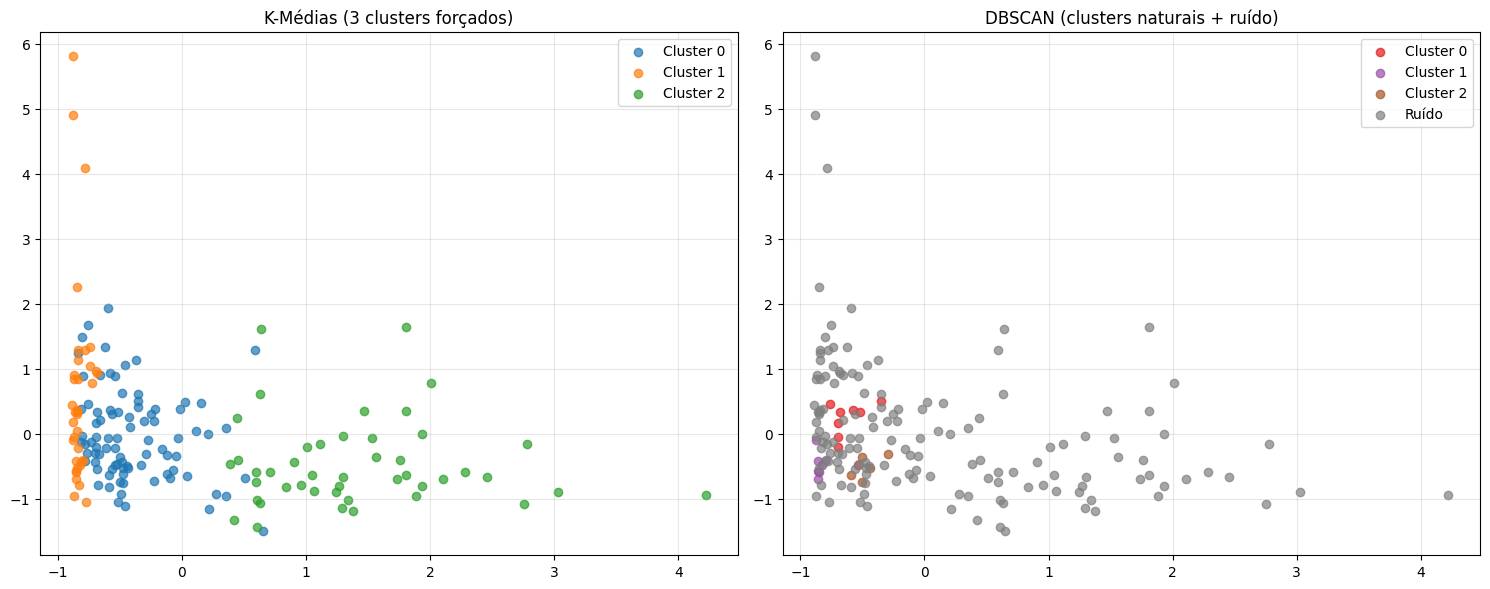


🎯 CONCLUSÕES:
   • DBSCAN identifica estrutura natural dos dados
   • K-Médias força agrupamento mesmo quando não natural
   • DBSCAN isola outliers sem afetar clusters principais
   • K-Médias permite que outliers distorçam resultados


In [95]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

print("\n" + "="*50)
print("DEMONSTRAÇÃO PRÁTICA: DBSCAN vs K-MÉDIAS")
print("="*50)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Análise dos resultados
unique_labels = set(dbscan_labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"\n📊 RESULTADOS DBSCAN:")
print(f"   Número de clusters encontrados: {n_clusters}")
print(f"   Número de pontos classificados como ruído: {n_noise}")
print(f"   Porcentagem de ruído: {(n_noise/len(df_scaled)*100):.1f}%")

print(f"\n🏷️ RÓTULOS ÚNICOS: {sorted(unique_labels)}")

# Comparação visual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# K-Médias
for cluster in range(3):
    cluster_data = df_scaled[df['kmeans_cluster'] == cluster]
    ax1.scatter(cluster_data[:, 0], cluster_data[:, 1],
               label=f'Cluster {cluster}', alpha=0.7)
ax1.set_title('K-Médias (3 clusters forçados)')
ax1.legend()
ax1.grid(alpha=0.3)

# DBSCAN
colors = plt.cm.Set1(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Ruído
        col = 'gray'
        label = 'Ruído'
    else:
        label = f'Cluster {k}'

    class_member_mask = (dbscan_labels == k)
    xy = df_scaled[class_member_mask]
    ax2.scatter(xy[:, 0], xy[:, 1], c=[col], label=label, alpha=0.7)

ax2.set_title('DBSCAN (clusters naturais + ruído)')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 CONCLUSÕES:")
print("   • DBSCAN identifica estrutura natural dos dados")
print("   • K-Médias força agrupamento mesmo quando não natural")
print("   • DBSCAN isola outliers sem afetar clusters principais")
print("   • K-Médias permite que outliers distorçam resultados")

In [96]:
print("\n" + "="*100)
print("📋 RESUMO COMPARATIVO: K-MÉDIAS vs K-MEDÓIDES vs DBSCAN")
print("="*100)

comparison_data = {
    'Característica': ['Sensibilidade a Outliers', 'Representante do Cluster',
                      'Número de Clusters', 'Forma dos Clusters', 'Interpretabilidade',
                      'Complexidade Computacional', 'Requer Escalonamento'],
    'K-Médias': ['Alta', 'Centróide (artificial)', 'Pré-definido', 'Esférica', 'Média',
                'Baixa-Média', 'Sim (obrigatório)'],
    'K-Medóides': ['Moderada', 'Medóide (real)', 'Pré-definido', 'Esférica', 'Alta',
                  'Alta', 'Sim (recomendado)'],
    'DBSCAN': ['Baixa (Robusto)', 'Não aplicável', 'Automático', 'Arbitrária', 'Média',
              'Média-Alta', 'Sim (obrigatório)']
}

comparison_df = pd.DataFrame(comparison_data)
#print(comparison_df.to_string(index=False))

print("\n💡 RECOMENDAÇÕES PRÁTICAS:")
print("   • Use K-Médias quando: dados limpos, clusters esféricos, velocidade importante")
print("   • Use K-Medóides quando: interpretabilidade crucial, alguns outliers presentes")
print("   • Use DBSCAN quando: muitos outliers, forma irregular, número desconhecido de clusters")


📋 RESUMO COMPARATIVO: K-MÉDIAS vs K-MEDÓIDES vs DBSCAN

💡 RECOMENDAÇÕES PRÁTICAS:
   • Use K-Médias quando: dados limpos, clusters esféricos, velocidade importante
   • Use K-Medóides quando: interpretabilidade crucial, alguns outliers presentes
   • Use DBSCAN quando: muitos outliers, forma irregular, número desconhecido de clusters


In [97]:
comparison_df

,Característica,K-Médias,K-Medóides,DBSCAN
0,Sensibilidade a Outliers,Alta,Moderada,Baixa (Robusto)
1,Representante do Cluster,Centróide (artificial),Medóide (real),Não aplicável
2,Número de Clusters,Pré-definido,Pré-definido,Automático
3,Forma dos Clusters,Esférica,Esférica,Arbitrária
4,Interpretabilidade,Média,Alta,Média
5,Complexidade Computacional,Baixa-Média,Alta,Média-Alta
6,Requer Escalonamento,Sim (obrigatório),Sim (recomendado),Sim (obrigatório)


In [98]:
# !pip freeze > requirements.txt